In [35]:
%%writefile C:/Users/asd_v/Mohey.py
print("I want this for now")
   
#for the See of the
# https://github.com/dunovank/jupyter-themes

from jupyterthemes import jtplot
jtplot.style(theme='grade3' , context='talk', fscale=1.4, spines=False, gridlines='--' , ticks=True,figsize=(6, 4.5) )
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
class Mohey():
    #my change dir
    def changedir(Dir):
        import os
        try:
            os.chdir(Dir)
        except:
            print("You are Here |"  , os.getcwd() ,  " |Plz check again Where u want to go")

    def visReset():
        jtplot.reset()
        
    def Nowarnings():
        import warnings
        warnings.filterwarnings(action='ignore')
        # import warnings
        # from sklearn.exceptions import DataConversionWarning
        # warnings.filterwarnings(action='ignore', category=DataConversionWarning)

Overwriting C:/Users/asd_v/Mohey.py


In [37]:
%run C:/Users/asd_v/Mohey.py
Mohey.changedir('./data')
Mohey.visReset()
Mohey.Nowarnings()

I want this for now
You are Here | E:\career\Dataa\github\practice python\Data Camp\Machine Learning Scientist with Python\data  |Plz check again Where u want to go


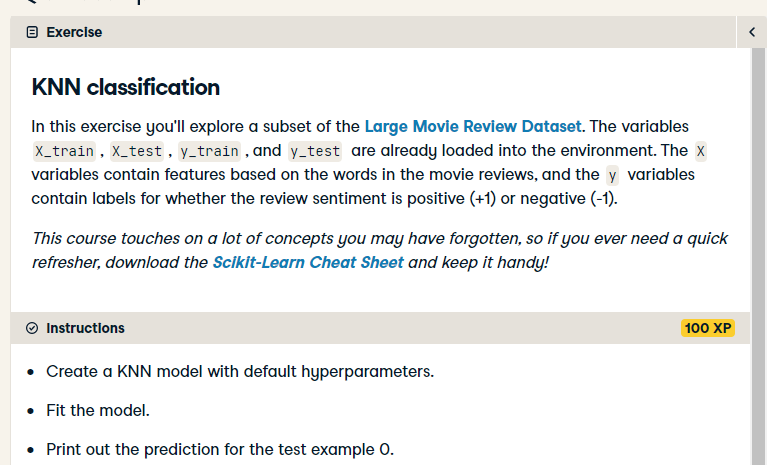

In [21]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# Apply logistic regression and print scores
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

# Apply SVM and print scores
svm = SVC()
svm.fit(X_train, y_train)
print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))


1.0
0.9622222222222222
0.9962880475129918
0.9911111111111112


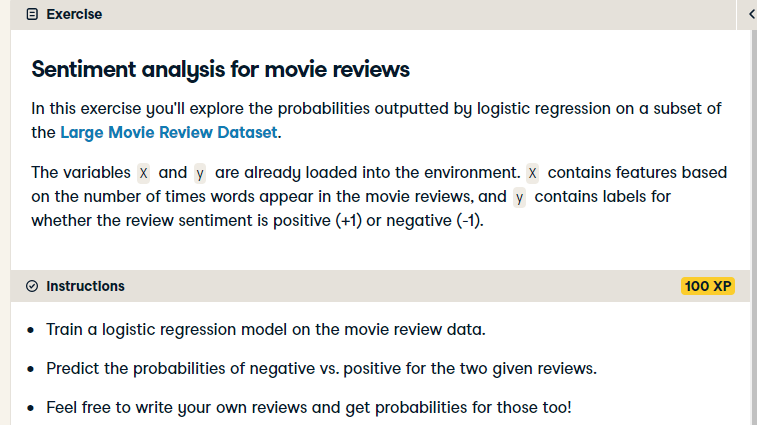

# Linear Decision Boundaries

* can be in any direction, or have multiple dimensions
* only has one boundary that separates data

# Non-linear Decision Boundaries

* can have discontinuous boundaries (islands)


* Logistic regression and SVMs learn linear decision boundaries

# Definitions

* **classification:** learning to predict categories
* **decision boundary:** surface separating predicted classes
* **linear classifier:** a classifier that learns linear decision boundaries (Logistic Regression, Linear SVC)
* **linearly seperable:** a dataset that can be perfectly classified by a linear classifier

In [39]:
X = np.array([[11.45,  2.4 ],       [13.62,  4.95],       [13.88,  1.89],       [12.42,  2.55],       [12.81,  2.31],       [12.58,  1.29],       [13.83,  1.57],       [13.07,  1.5 ],       [12.7 ,  3.55],       [13.77,  1.9 ],       [12.84,  2.96],       [12.37,  1.63],       [13.51,  1.8 ],       [13.87,  1.9 ],       [12.08,  1.39],       [13.58,  1.66],       [13.08,  3.9 ],       [11.79,  2.13],       [12.45,  3.03],       [13.68,  1.83],       [13.52,  3.17],       [13.5 ,  3.12],       [12.87,  4.61],       [14.02,  1.68],       [12.29,  3.17],       [12.08,  1.13],       [12.7 ,  3.87],       [11.03,  1.51],       [13.32,  3.24],       [14.13,  4.1 ],       [13.49,  1.66],       [11.84,  2.89],       [13.05,  2.05],       [12.72,  1.81],       [12.82,  3.37],       [13.4 ,  4.6 ],       [14.22,  3.99],       [13.72,  1.43],       [12.93,  2.81],       [11.64,  2.06],       [12.29,  1.61],       [11.65,  1.67],       [13.28,  1.64],       [12.93,  3.8 ],       [13.86,  1.35],       [11.82,  1.72],       [12.37,  1.17],       [12.42,  1.61],       [13.9 ,  1.68],       [14.16,  2.51]])
y = np.array([ True,  True, False,  True,  True,  True, False, False,  True,       False,  True,  True, False, False,  True, False,  True,  True,        True, False,  True,  True,  True, False,  True,  True,  True,        True,  True,  True,  True,  True, False,  True,  True,  True,       False, False,  True,  True,  True,  True, False, False, False,        True,  True,  True, False,  True])

In [43]:
#https://github.com/UBC-CS/cpsc340/blob/master/lectures/plot_classifier.py#L95
import numpy as np
import matplotlib.pyplot as plt

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in
    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional
    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, proba=False, transformation=None, **params):
    """Plot the decision boundaries for a classifier.
    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """

    X = np.c_[xx.ravel(), yy.ravel()]
    if transformation is not None:
        X = transformation(X)
        # xx = np.reshape(X[:,0], xx.shape)
        # yy = np.reshape(X[:,1], yy.shape)


    if proba:
        if hasattr(clf, 'predict_proba'):
            Z = clf.predict_proba(X)[:,-1]
            Z = Z.reshape(xx.shape)
            out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), origin='lower', vmin=0, vmax=1, **params)
            ax.contour(xx, yy, Z, levels=[0.5])
        else:
            Z = clf.decision_function(X)
            Z = Z.reshape(xx.shape)
            out = ax.contourf(xx, yy, Z, **params)
    else:
        Z = clf.predict(X)
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out

# adapted from http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html
def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, transformation=None): # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False

    # can abstract some of this into a higher-level function for learners to call
    plot_contours(ax, clf, xx, yy, proba=proba, transformation=transformation, cmap=plt.cm.coolwarm, alpha=0.8)
    #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k', linewidth=1)
    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
#     ax.set_xlabel(data.feature_names[0])
#     ax.set_ylabel(data.feature_names[1])
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
#     ax.set_title(title)
    if show:
        plt.show()
    else:
        return ax

def plot_4_classifiers(X, y, clfs):

    # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(2, 2)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

    for clf, ax, title in zip(clfs, sub.flatten(), ("(1)", "(2)", "(3)", "(4)")):
        # clf.fit(X, y)
        plot_classifier(X, y, clf, ax, ticks=True)
        ax.set_title(title)
    plt.show()



def plot_loss_diagram(labels_inside=False):
    grid = np.linspace(-2,2,1000)
    plt.figure()
    plt.xlabel('$y_iw^T x_i$', fontsize=18)
    # plt.xlabel('raw model output')
    plt.ylabel('$f_i(w)$', fontsize=18)
    plt.xlim(-2,2)
    plt.ylim(-0.025,3)
    plt.fill_between([0, 2], -1, 3, facecolor='blue', alpha=0.2);
    plt.fill_between([-2, 0], -1, 3, facecolor='red', alpha=0.2);
    plt.yticks([0,1,2,3]);

    if labels_inside:
        plt.text(-1.95, 2.73, "incorrect prediction", fontsize=15) # 2.68
        plt.text(0.15, 2.73, "correct prediction", fontsize=15)
    else:
        plt.text(-1.95, 3.1, "incorrect prediction", fontsize=15) # 2.68
        plt.text(0.15, 3.1, "correct prediction", fontsize=15)


    plt.tight_layout()

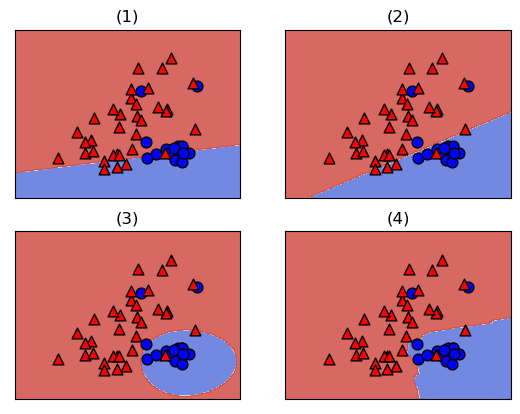

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

# Define the classifiers
classifiers = [LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')]

# Fit the classifiers
for c in classifiers:
    c.fit(X, y)

# Plot the classifiers
plot_4_classifiers(X, y, classifiers)
plt.show()

Dot product is multiplication in higher dimensions
each value in an array is multiplied by the value in the same position of the other array
 
 # Linear Classifier Prediction
 
* raw model output = coefficients * features + intercept
* linear classifier prediction: always check the sign 
>* if positive -- predict one class
>* if negative -- predict the other class
* Same for logistic regression and linear SVM
>* **fit is different but predict is the same**

along a decision boundary the model will = 0 <br>
above it = positive <br>
below it = negative

In [50]:
X = np.array([[ 1.78862847,  0.43650985],       [ 0.09649747, -1.8634927 ],       [-0.2773882 , -0.35475898],       [-3.08274148,  2.37299932],       [-3.04381817,  2.52278197],       [-1.31386475,  0.88462238],       [-2.11868196,  4.70957306],       [-2.94996636,  2.59532259],       [-3.54535995,  1.45352268],       [ 0.98236743, -1.10106763],       [-1.18504653, -0.2056499 ],       [-1.51385164,  3.23671627],       [-4.02378514,  2.2870068 ],       [ 0.62524497, -0.16051336],       [-3.76883635,  2.76996928],       [ 0.74505627,  1.97611078],       [-1.24412333, -0.62641691],       [-0.80376609, -2.41908317],       [-0.92379202, -1.02387576],       [ 1.12397796, -0.13191423]])
y = np.array([-1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1,       -1, -1, -1])

In [51]:
model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
model.fit(X,y)

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

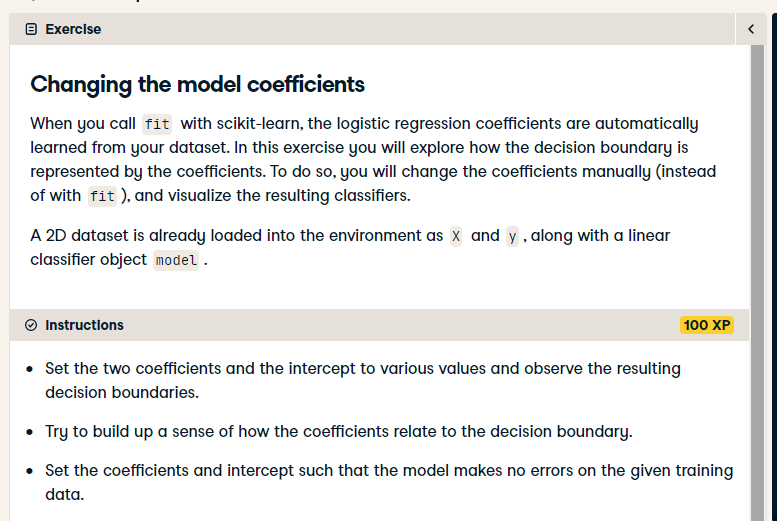

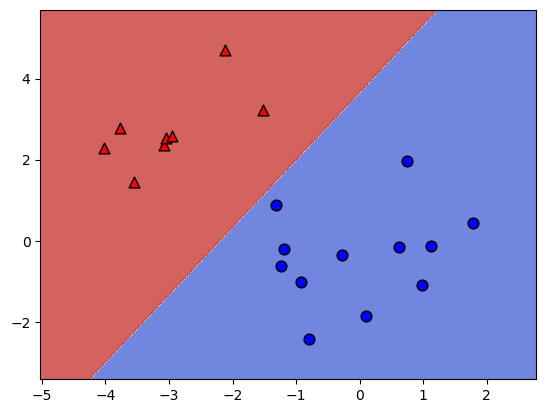

Number of errors: 0


In [56]:
# Set the coefficients
model.coef_ = np.array([[-5,3]])
model.intercept_ = np.array([-11])

# Plot the data and decision boundary
plot_classifier(X,y,model)

# Print the number of errors
num_err = np.sum(y != model.predict(X))
print("Number of errors:", num_err)

# Least squares: the squared loss

* scikit-learn's LinearRegression minimizes a loss
* error is defined as the difference between the true target value and the predicted target value
* Minimization is with respect to coefficients or parameters of the model.
* Note that in scikit-learn model.score() isn't necessarily the loss function.


# Classification errors: the 0-1 loss

* Squared loss not appropriate for classification problems
* A natural loss for classification problem is the number of errors:
>* This is the 0-1 loss: it's 0 for a correct prediction and 1 for an incorrect prediction.
>* but this loss is hard to minimize

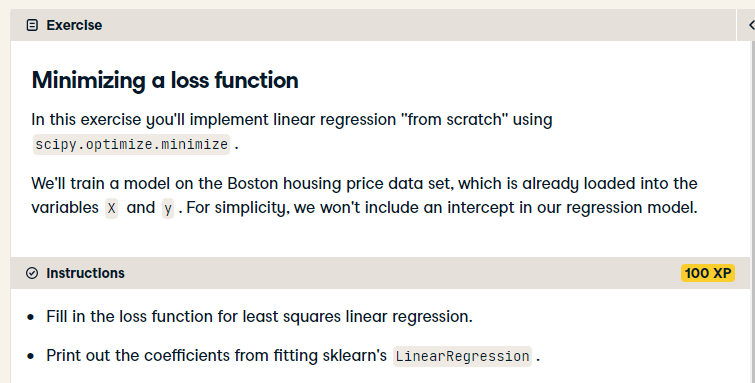

In [62]:
import numpy as np

In [65]:
X = np.genfromtxt('MinimizeX.txt' , delimiter = ',')
y = np.array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21.5, 19.6, 15.3, 19.4,       17. , 15.6, 13.1, 41.3, 24.3, 23.3, 27. , 50. , 50. , 50. , 22.7,       25. , 50. , 23.8, 23.8, 22.3, 17.4, 19.1, 23.1, 23.6, 22.6, 29.4,       23.2, 24.6, 29.9, 37.2, 39.8, 36.2, 37.9, 32.5, 26.4, 29.6, 50. ,       32. , 29.8, 34.9, 37. , 30.5, 36.4, 31.1, 29.1, 50. , 33.3, 30.3,       34.6, 34.9, 32.9, 24.1, 42.3, 48.5, 50. , 22.6, 24.4, 22.5, 24.4,       20. , 21.7, 19.3, 22.4, 28.1, 23.7, 25. , 23.3, 28.7, 21.5, 23. ,       26.7, 21.7, 27.5, 30.1, 44.8, 50. , 37.6, 31.6, 46.7, 31.5, 24.3,       31.7, 41.7, 48.3, 29. , 24. , 25.1, 31.5, 23.7, 23.3, 22. , 20.1,       22.2, 23.7, 17.6, 18.5, 24.3, 20.5, 24.5, 26.2, 24.4, 24.8, 29.6,       42.8, 21.9, 20.9, 44. , 50. , 36. , 30.1, 33.8, 43.1, 48.8, 31. ,       36.5, 22.8, 30.7, 50. , 43.5, 20.7, 21.1, 25.2, 24.4, 35.2, 32.4,       32. , 33.2, 33.1, 29.1, 35.1, 45.4, 35.4, 46. , 50. , 32.2, 22. ,       20.1, 23.2, 22.3, 24.8, 28.5, 37.3, 27.9, 23.9, 21.7, 28.6, 27.1,       20.3, 22.5, 29. , 24.8, 22. , 26.4, 33.1, 36.1, 28.4, 33.4, 28.2,       22.8, 20.3, 16.1, 22.1, 19.4, 21.6, 23.8, 16.2, 17.8, 19.8, 23.1,       21. , 23.8, 23.1, 20.4, 18.5, 25. , 24.6, 23. , 22.2, 19.3, 22.6,       19.8, 17.1, 19.4, 22.2, 20.7, 21.1, 19.5, 18.5, 20.6, 19. , 18.7,       32.7, 16.5, 23.9, 31.2, 17.5, 17.2, 23.1, 24.5, 26.6, 22.9, 24.1,       18.6, 30.1, 18.2, 20.6, 17.8, 21.7, 22.7, 22.6, 25. , 19.9, 20.8,       16.8, 21.9, 27.5, 21.9, 23.1, 50. , 50. , 50. , 50. , 50. , 13.8,       13.8, 15. , 13.9, 13.3, 13.1, 10.2, 10.4, 10.9, 11.3, 12.3,  8.8,        7.2, 10.5,  7.4, 10.2, 11.5, 15.1, 23.2,  9.7, 13.8, 12.7, 13.1,       12.5,  8.5,  5. ,  6.3,  5.6,  7.2, 12.1,  8.3,  8.5,  5. , 11.9,       27.9, 17.2, 27.5, 15. , 17.2, 17.9, 16.3,  7. ,  7.2,  7.5, 10.4,        8.8,  8.4, 16.7, 14.2, 20.8, 13.4, 11.7,  8.3, 10.2, 10.9, 11. ,        9.5, 14.5, 14.1, 16.1, 14.3, 11.7, 13.4,  9.6,  8.7,  8.4, 12.8,       10.5, 17.1, 18.4, 15.4, 10.8, 11.8, 14.9, 12.6, 14.1, 13. , 13.4,       15.2, 16.1, 17.8, 14.9, 14.1, 12.7, 13.5, 14.9, 20. , 16.4, 17.7,       19.5, 20.2, 21.4, 19.9, 19. , 19.1, 19.1, 20.1, 19.9, 19.6, 23.2,       29.8, 13.8, 13.3, 16.7, 12. , 14.6, 21.4, 23. , 23.7, 25. , 21.8,       20.6, 21.2, 19.1, 20.6, 15.2,  7. ,  8.1, 13.6, 20.1, 21.8, 24.5,       23.1, 19.7, 18.3, 21.2, 17.5, 16.8, 22.4, 20.6, 23.9, 22. , 11.9])

In [66]:
from scipy.optimize import minimize, rosen, rosen_der
from sklearn.linear_model import LinearRegression
# The squared error, summed over training examples
def my_loss(w):
    s = 0
    for i in range(y.size):
        # Get the true and predicted target values for example 'i'
        y_i_true = y[i]
        y_i_pred = w@X[i]
        s = s + (y_i_true - y_i_pred)**2
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LinearRegression coefficients
lr = LinearRegression(fit_intercept=False).fit(X,y)
print(lr)

[-9.16300907e-02  4.86748824e-02 -3.78305373e-03  2.85638035e+00
 -2.88081110e+00  5.92521193e+00 -7.22452473e-03 -9.67998196e-01
  1.70436606e-01 -9.38881453e-03 -3.92423714e-01  1.49830586e-02
 -4.16973048e-01]
LinearRegression(fit_intercept=False)


# Loss function

* linear regression bad since classification is binary
* logisic loss smooth version of 0-1 loss (slowly decreases)
* hinge loss used in SVM linear to flat

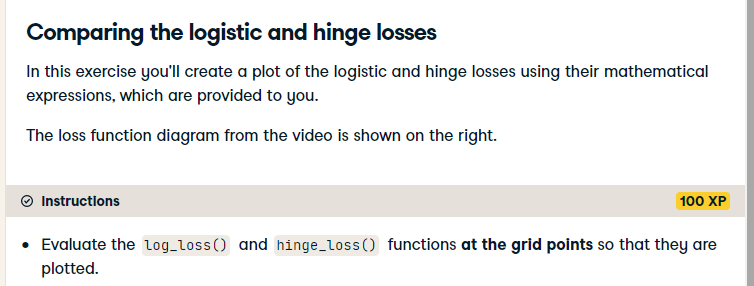

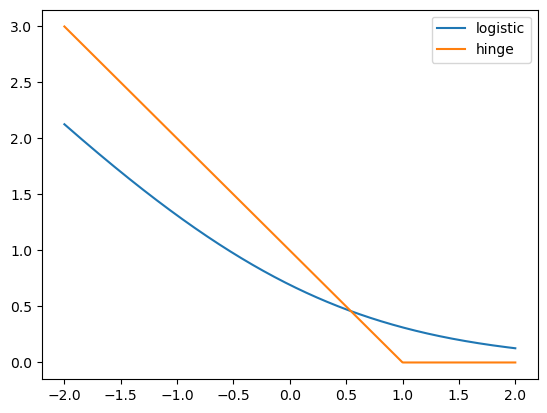

In [67]:
# Mathematical functions for logistic and hinge losses
def log_loss(raw_model_output):
   return np.log(1+np.exp(-raw_model_output))
def hinge_loss(raw_model_output):
   return np.maximum(0,1-raw_model_output)

# Create a grid of values and plot
grid = np.linspace(-2,2,1000)
plt.plot(grid, log_loss(grid), label='logistic')
plt.plot(grid, hinge_loss(grid), label='hinge')
plt.legend()
plt.show()

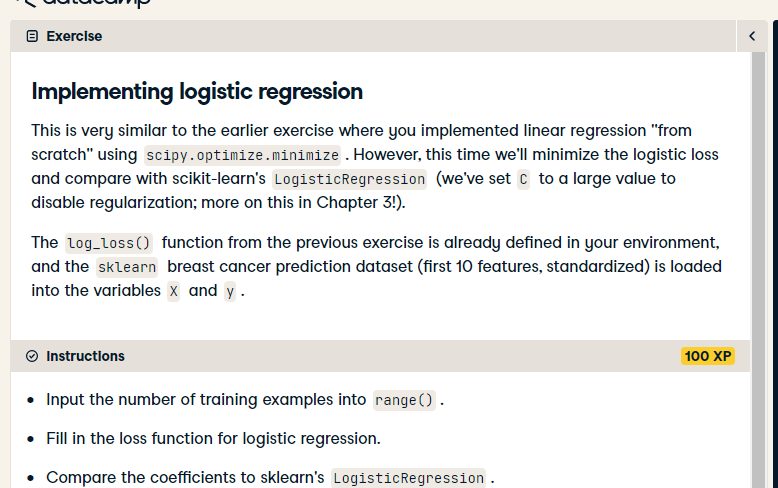

In [76]:
X = np.genfromtxt('LossX.txt' , delimiter= ',')
w_fit = np.array([ 1.03592182, -1.65378492,  4.08331342, -9.40923002, -1.06786489,
        0.07892114, -0.85110344, -2.44103305, -0.45285671,  0.43353448])

In [77]:
y = np.array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,       -1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,        1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,        1,  1, -1,  1, -1, -1,  1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1,       -1, -1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1,        1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,       -1,  1, -1, -1,  1,  1,  1, -1, -1,  1, -1,  1, -1, -1,  1, -1, -1,        1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,        1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1, -1, -1,  1,        1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1, -1,  1, -1,        1,  1,  1, -1,  1,  1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,        1, -1,  1, -1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1, -1,  1,        1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1, -1, -1,        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1,       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,       -1,  1, -1,  1,  1, -1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1,        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,       -1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1, -1,        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,        1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1,  1, -1, -1,        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,        1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,       -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,        1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1, -1,        1,  1, -1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,        1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1,        1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1,        1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,        1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,        1, -1, -1, -1, -1, -1, -1,  1])


In [78]:
# The logistic loss, summed over training examples
def my_loss(w):
    s = 0
    for i in range(len(X)):
        raw_model_output = w@X[i]
        s = s + log_loss(raw_model_output * y[i])
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LogisticRegression
lr = LogisticRegression(fit_intercept=False, C=1000000).fit(X,y)
print(lr.coef_)

[ 1.03567823 -1.65378593  4.08358108 -9.40924035 -1.0678611   0.07890329
 -0.85110023 -2.44104259 -0.45285512  0.43353268]
[[ 1.03665946 -1.65380077  4.08233062 -9.40904867 -1.06787935  0.07901598
  -0.85099843 -2.44107473 -0.45288928  0.43348202]]


# Regularized Logistic Regression

in scikit learn the hyperparameter 'C' is the inverse of the regularization strength
* larger C means less regularization
* smaller C means more
<br><br>
* regularized loss = original loss + large coefficient penalty
* **more regularization: lower training accuracy**
* **more regularization: (almost always) higher test accuracy**
<br><br>
* if large features were causing overfitting, regularization causes less overfitting from diminishing feature size

# L1 vs L2 regularization

Lasso = linear regression with L1 regularization <br>
Ridge = linear regression with L2 regularization <br>
For other models like logistic regression we just say L1, L2, etc.

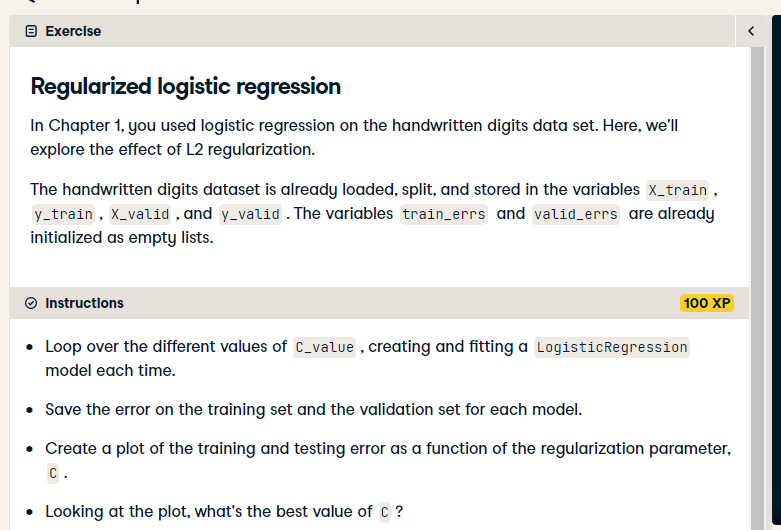

In [82]:
X_train, y_train =  np.genfromtxt('X_train.txt' , delimiter= ','), np.genfromtxt('Y_train.txt' , delimiter= ',')
X_valid, y_valid = np.genfromtxt('X_val.txt' , delimiter= ','), np.genfromtxt('y_val.txt' , delimiter= ',')

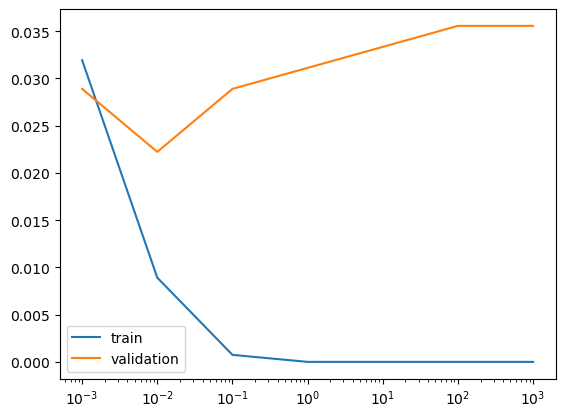

In [85]:
# Train and validaton errors initialized as empty list
train_errs = list()
valid_errs = list()

# Loop over values of C_value
for C_value in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    # Create LogisticRegression object and fit
    lr = LogisticRegression(C=C_value)
    lr.fit(X_train, y_train)
    
    # Evaluate error rates and append to lists
    train_errs.append( 1.0 - lr.score(X_train, y_train) )
    valid_errs.append( 1.0 - lr.score(X_valid, y_valid) )
C_value = 1000
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
# Plot results
plt.semilogx(C_values, train_errs, C_values, valid_errs)
plt.legend(("train", "validation"))
plt.show()

# Logistic regression and feature selection

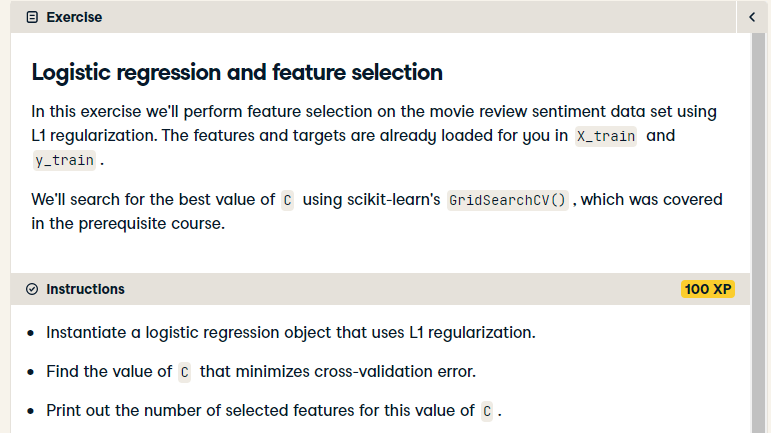

In [87]:
from sklearn.model_selection import GridSearchCV

In [104]:
# Specify L1 regularization
lr =LogisticRegression(class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10]})
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

# Find the number of nonzero coefficients (selected features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

Best CV params {'C': 1}
Total number of features: 640
Number of selected features: 364


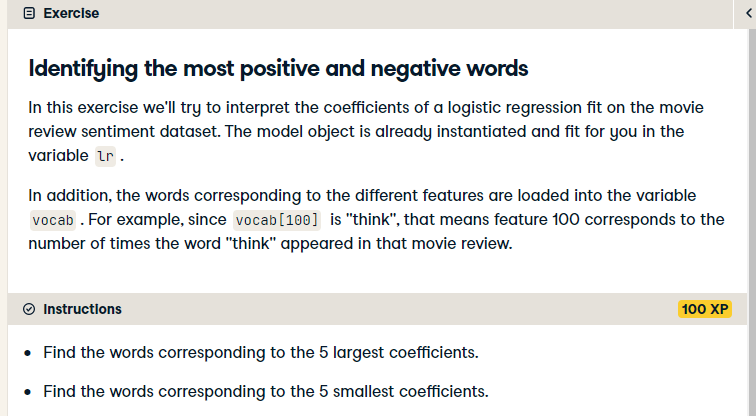

How are these probabilities computed?
* logistic regression predictions: sign of raw model output
* logistic regression probabilities: "squashed" raw model output
* **USE SIGMOID FUNCTION** 

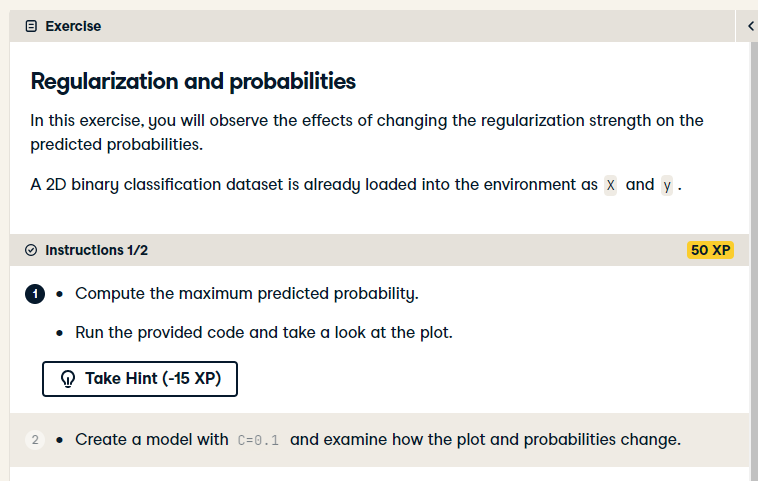

In [117]:
X,y = (np.array([[ 1.78862847,  0.43650985],        [ 0.09649747, -1.8634927 ],        [-0.2773882 , -0.35475898],        [-3.08274148,  2.37299932],        [-3.04381817,  2.52278197],        [-1.31386475,  0.88462238],        [-2.11868196,  4.70957306],        [-2.94996636,  2.59532259],        [-3.54535995,  1.45352268],        [ 0.98236743, -1.10106763],        [-1.18504653, -0.2056499 ],        [-1.51385164,  3.23671627],        [-4.02378514,  2.2870068 ],        [ 0.62524497, -0.16051336],        [-3.76883635,  2.76996928],        [ 0.74505627,  1.97611078],        [-1.24412333, -0.62641691],        [-0.80376609, -2.41908317],        [-0.92379202, -1.02387576],        [ 1.12397796, -0.13191423]]), np.array([-1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1,        -1, -1, -1]))

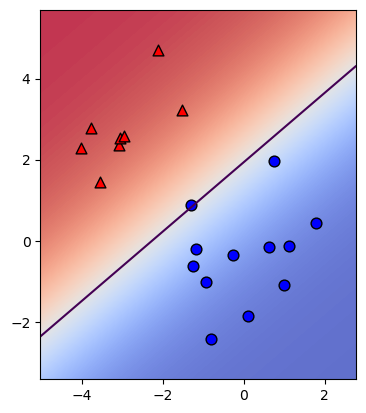

Maximum predicted probability 0.9761229967078282


In [125]:
# Set the regularization strength
model = LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Fit and plot
model.fit(X,y)
plot_classifier(X,y,model,proba=True)

# Predict probabilities on training points
prob = model.predict_proba(X)
print("Maximum predicted probability", np.max(prob))

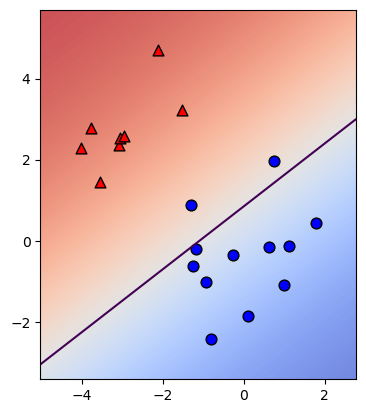

Maximum predicted probability 0.8990965658995651


In [124]:
# Set the regularization strength
model = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Fit and plot
model.fit(X,y)
plot_classifier(X,y,model,proba=True)

# Predict probabilities on training points
prob = model.predict_proba(X)
print("Maximum predicted probability", np.max(prob))

As you probably noticed, smaller values of C lead to less confident predictions. That's because smaller C means more regularization, which in turn means smaller coefficients, which means raw model outputs closer to zero and, thus, probabilities closer to 0.5 after the raw model output is squashed through the sigmoid function.

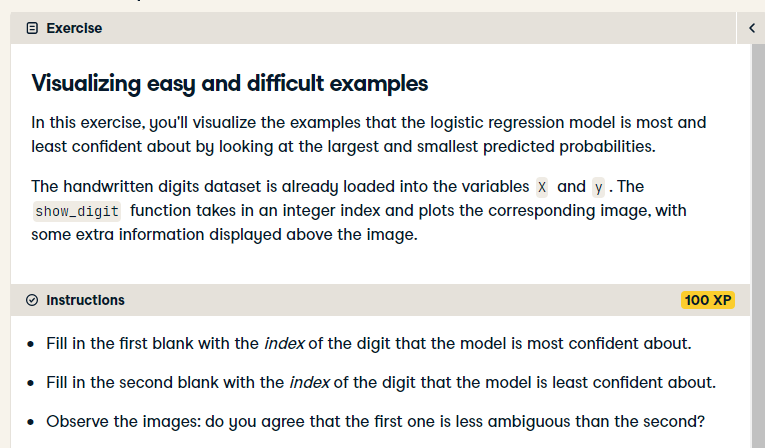

In [142]:
X_y = np.genfromtxt('X,Y.txt' , delimiter=',')
X = X_y[:,1:65]
y = X_y[:,[64]]

In [209]:
def show_digit(i, lr=None):
    plt.imshow(np.reshape(X[i], (8,8)), cmap='gray', vmin = 0, vmax = 16, interpolation=None)
    plt.xticks(())
    plt.yticks(())
    if lr is None:
        plt.title("class label = %d" % y[i])
    else:
        pred = lr.predict(X[i][None])
        pred_prob = lr.predict_proba(X[i][None])[0,pred.astype('int')]
        plt.title("label=%d, prediction=%d, proba=%.2f" % (y[i], pred, pred_prob))
    plt.show()

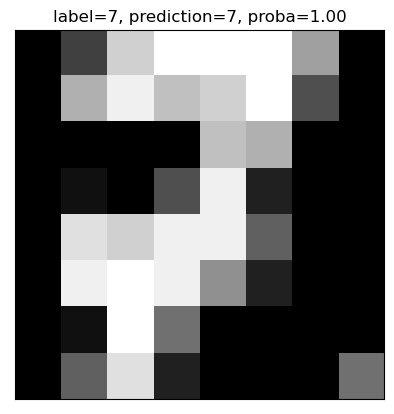

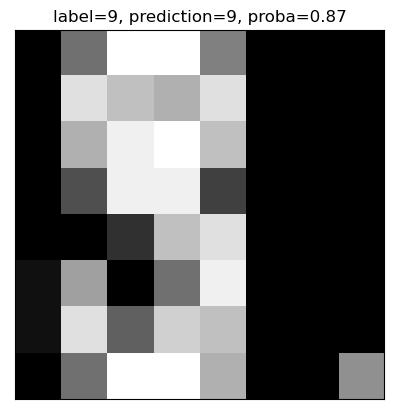

In [210]:
lr = LogisticRegression()
lr.fit(X,y)

# Get predicted probabilities
proba = lr.predict_proba(X)

# Sort the example indices by their maximum probability
proba_inds = np.argsort(np.max(proba,axis=1))

# Show the most confident (least ambiguous) digit
show_digit(proba_inds[-1], lr)

# Show the least confident (most ambiguous) digit
show_digit(proba_inds[0], lr)

Combining binary classifiers with one-vs-rest
* one-vs-rest is **default** for scikit learn's logistic regression

# One-vs-rest:

* fit a binary classifier for each class
* predict with all, take largest output
* pro: simple, modular
* con: not directly optimizing accuracy
* common for SVMs as well
* can produce probabilities

# "Multinomial" or "softmax":

* fit a single classifier for all classes
* prediction directly outputs best class
* con: more complicated, new code
* pro: tackle the problem directly
* possible for SVMs, but less common
* can produce probabilities

# Model coefficients for multi-class

require non-default solver such as "lbfgs"<br>
example below

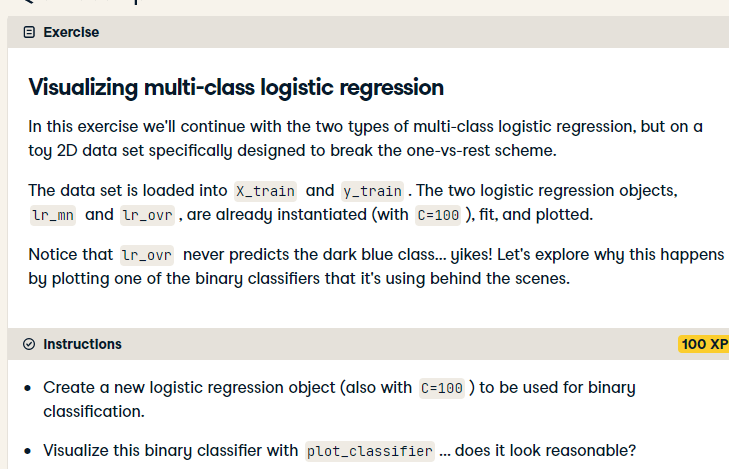

In [214]:
X_train = np.array([[-2.83895657e-01, -9.51457706e-01],       [ 5.33624372e-01,  1.23918071e+00],       [-1.17337815e+00, -1.21258188e-01],       [-1.19338379e+00,  7.97747166e-01],       [-3.74902201e-01, -3.99647889e-01],       [-1.11678880e+00, -3.63057976e-01],       [ 3.92567929e-02, -1.03949311e+00],       [-4.60496902e-01,  7.92206150e-01],       [ 3.73372234e-01,  4.49455588e-01],       [-5.68303256e-01, -1.12326024e+00],       [-8.10825377e-01, -6.71197010e-01],       [-2.23456895e-01,  5.01300063e-01],       [ 3.31395128e-01, -8.81087488e-01],       [ 1.23187925e+00,  6.36307263e-01],       [-1.19438566e-01, -1.70031450e+00],       [-3.56432381e-01,  8.17597947e-01],       [ 3.68396844e-01, -4.89405078e-01],       [-2.55373639e-01, -4.18075333e-01],       [-1.32645347e+00,  1.04344987e+00],       [-5.92850474e-01, -8.01421997e-01],       [ 7.27961902e-01, -1.12489821e+00],       [-2.13511481e+00,  1.53256634e+00],       [ 2.30542073e-01, -8.68803803e-01],       [ 1.09813977e+00,  5.83409537e-01],       [ 8.38336530e-01,  6.17109567e-01],       [ 4.86438237e-01,  3.06669383e-01],       [ 7.86915440e-01,  4.44667097e-01],       [-4.78932579e-01, -5.66539851e-01],       [-2.03300554e-01,  9.36879327e-01],       [ 3.39165831e-01,  8.12534012e-01],       [-3.61733276e-01,  3.63540549e-01],       [ 1.18603363e+00, -2.01359716e+00],       [-4.87253757e-01, -6.37446081e-01],       [-1.88698497e-01, -5.82874621e-01],       [ 9.81411621e-01,  1.33941738e+00],       [ 1.50189299e+00,  1.03081206e+00],       [-6.44426536e-02, -3.81126339e-01],       [ 1.28839740e+00,  1.54321683e+00],       [-9.02379254e-01,  2.12912925e-01],       [-2.75943790e-01,  6.62190410e-01],       [ 1.85875489e-04, -2.22687852e+00],       [-1.36218486e-01, -6.12143582e-01],       [-8.01189309e-01, -7.31571602e-01],       [-1.31114360e+00, -1.11160107e-01],       [-1.82715882e-01,  3.45742341e-01],       [ 1.62577984e+00,  9.82365559e-02],       [ 1.18754221e+00, -9.88047256e-01],       [ 3.30896348e-01,  1.74147081e+00],       [ 1.06319463e+00,  7.25707477e-01],       [-6.31172777e-02,  5.03138338e-01],       [ 3.70221639e-01,  1.27315366e+00],       [-3.14443989e-03, -2.64384583e-01],       [ 3.57484301e-01, -2.27657772e-02],       [-7.10889392e-01,  1.54688358e+00],       [ 7.62329973e-01,  1.33254405e+00],       [-1.55233553e+00, -1.52337441e+00],       [-1.00339689e+00,  2.11862140e+00],       [ 7.22823193e-01,  3.35405706e-01],       [ 9.12755253e-02, -5.04468641e-01],       [ 4.95114934e-02, -2.44690106e-01],       [-1.40309968e+00, -5.12395416e-01],       [-7.75501690e-01, -6.02394114e-01],       [ 1.24435378e+00,  1.05314888e+00],       [-2.23130848e-02,  1.87403279e+00],       [-2.22779816e+00,  1.27046867e+00],       [ 4.42928990e-02,  5.97549446e-01],       [ 1.14098613e+00,  8.51490630e-01],       [ 1.44165046e+00, -8.66600209e-01],       [ 1.32295140e-01,  1.62653413e+00],       [ 3.69308441e-02,  1.67786453e+00],       [-6.12975983e-01, -1.35405850e+00],       [ 8.22080441e-01, -7.45448227e-01],       [-1.03015455e+00,  1.57828451e+00],       [-1.27392825e+00, -1.19848757e-01],       [-4.22882508e-01, -3.05961769e-01],       [ 1.05127378e+00, -2.29052289e+00],       [-7.89554501e-01,  8.57037168e-04],       [ 3.73018740e-01, -4.98468373e-01],       [-7.21550677e-01, -5.22821271e-01],       [ 1.91021707e+00, -1.52700869e+00],       [ 6.18671454e-01,  5.31270233e-01],       [-1.12104559e+00,  2.87688027e+00],       [ 1.21061741e+00, -5.48616370e-01],       [-1.25680616e+00, -6.13281706e-02],       [-1.50756706e+00,  4.18340765e-01],       [ 7.11133123e-01, -7.15113895e-01],       [-4.22620092e-01,  5.79287166e-01],       [-9.34751978e-01,  3.60387487e-02],       [ 1.21135650e+00, -5.78726752e-01],       [-1.15320171e+00, -4.85969087e-02],       [ 2.62171741e+00,  7.01010427e-01],       [-1.48673284e-02, -9.33967286e-01],       [-4.71193685e-01,  1.48297028e-01],       [ 2.19748594e+00,  8.18579786e-02],       [ 8.95326539e-01, -8.20358903e-01],       [-6.17111080e-01,  1.27571264e+00],       [ 1.09948335e+00, -1.26033634e+00],       [-2.59602194e-01,  7.62758510e-01],       [ 8.26861357e-01, -8.98524452e-01],       [ 1.17328060e+00, -2.02972829e-01],       [ 9.44652675e-02,  1.11263639e+00],       [ 7.93685036e-02,  2.91707420e-01],       [ 8.55134983e-01, -1.86820269e+00],       [-3.33377592e-02, -8.21471683e-01],       [ 1.08195801e+00, -9.12742251e-01],       [-9.59114991e-01, -9.32883669e-01],       [-1.09944058e-01,  4.29168341e-01],       [ 8.47500557e-01,  2.00541178e-01],       [ 8.97969301e-01, -1.34475096e+00],       [-7.45549265e-01,  3.38558393e+00],       [-2.35167941e-01,  1.16971717e-01],       [ 3.82228847e-01, -1.89098191e+00],       [ 4.46548315e-01, -1.90550205e-01],       [ 1.03125402e+00, -6.10175894e-01],       [ 8.98533636e-01, -8.27191628e-01],       [-1.33555205e+00, -8.75184223e-01],       [-3.82730422e-01,  1.30044462e+00],       [ 7.03771022e-02,  3.63324429e-01],       [-3.82547777e-01, -1.33433884e-02],       [-9.28831114e-01, -1.24595217e-01],       [-4.18020419e-01,  4.48693923e-02],       [-1.14297594e+00, -4.20076628e-01],       [-1.34085140e+00, -1.04693788e+00],       [-5.75321695e-01, -1.87324354e+00],       [ 1.05179314e+00,  1.50698744e-01],       [-2.41168156e-01, -4.36437276e-01],       [ 1.46929860e+00, -9.03666003e-01],       [ 2.39422640e-01, -2.90113812e-01],       [ 4.08505448e-01,  4.27716109e-01],       [ 1.03080433e+00, -1.54913404e-03],       [-1.02676711e+00,  7.21155407e-01],       [ 1.24298760e+00,  6.05352492e-01],       [ 9.98158704e-02,  7.85882456e-01],       [-3.30989273e-01,  1.87923919e-01],       [ 1.46427195e-01, -7.74987386e-01],       [ 6.27556539e-01,  2.16992322e+00],       [ 1.91133871e-01,  1.70918433e+00],       [-3.87055670e-01, -1.23621603e+00],       [ 1.30466697e+00,  1.89116566e-01],       [-1.00664113e+00, -1.82069688e+00],       [ 2.04048554e-01,  1.18707347e+00],       [-1.30907152e+00,  5.66034777e-02],       [ 3.40083444e-01, -9.90222332e-01],       [ 2.13573178e-01, -2.94037076e+00],       [-2.36084944e-02, -2.27832455e+00],       [ 9.22675071e-01,  2.14198658e+00],       [-8.85698364e-01, -1.82381255e+00],       [-1.55801959e+00,  7.58114660e-01],       [ 1.48191669e+00, -7.29229056e-01],       [ 3.45873152e+00,  3.45013732e-01],       [-3.87080518e-01,  1.11669888e+00],       [ 4.38763001e-01,  6.12595812e-01],       [ 6.72911640e-01,  1.14420429e+00],       [ 8.93632281e-01,  3.54641572e-01],       [-6.90807494e-01, -4.59634838e-01],       [-4.15753108e-01,  2.07834911e+00],       [ 4.17739748e-01,  1.15217233e+00],       [-6.49536218e-01, -1.29778992e+00],       [ 8.79936159e-01, -1.17037420e+00],       [ 1.32963509e+00,  7.77819970e-01],       [ 1.67576848e+00,  3.71978129e-01],       [-1.00808260e+00,  2.57843572e-01],       [ 1.53015384e+00,  2.27643840e-01],       [-6.18754318e-01, -6.41954617e-01],       [-8.71107452e-01,  3.11477892e-01],       [ 6.37622987e-01,  2.03146691e+00],       [-3.10980526e-01, -1.79036690e-01],       [-6.45468284e-01, -1.25491015e+00],       [ 4.71158947e-01, -2.39641054e+00],       [-6.47038417e-01,  7.45740049e-01],       [ 1.11893355e-01,  9.23820401e-02],       [ 2.46226478e-01,  3.13062906e-01],       [-1.01089039e-01,  3.62849379e-02],       [ 1.71659568e-01, -1.35927630e+00],       [ 3.40480960e-01,  1.16674832e+00],       [-2.56618477e-01,  2.08152722e+00],       [ 1.53315515e+00,  2.88728123e-01],       [-5.31455590e-01,  4.13138729e-01],       [ 1.39559634e+00,  1.21110653e-01],       [-2.21472479e-01,  5.40642292e-01],       [-4.96250861e-01, -3.33320300e-01],       [ 6.16439064e-01, -1.03542338e+00],       [-3.12897613e+00,  4.76362013e-01],       [-6.99437789e-01, -1.75830724e-01],       [ 1.71519587e+00,  1.01602638e-01],       [ 5.19186062e-01, -1.35492173e+00],       [ 6.82204596e-01,  8.73433968e-01],       [-1.08581585e+00,  1.75168166e-01],       [-4.22907282e-01, -5.65107061e-01],       [-3.71555929e-01, -1.42305714e+00],       [-8.21577003e-01,  5.28010495e-01],       [ 7.86870071e-02,  9.24843550e-02],       [-2.16193119e-01,  5.86193381e-01],       [-1.22548359e+00,  2.48846802e-01],       [-1.55000064e+00,  1.56518980e+00],       [-9.60286755e-01, -3.40835920e-01],       [-1.21420118e+00, -3.54183421e-01],       [-6.17941477e-01,  8.49677284e-02],       [-1.26821697e+00,  1.53634503e+00],       [-1.04121511e-01, -3.09345590e-01],       [-3.24089313e-01,  9.14684501e-02],       [-3.46051731e-01,  2.71948412e-01],       [ 5.49168052e-01, -7.03300534e-02],       [-6.29554699e-02, -8.28104012e-02],       [-1.66552903e-01, -6.81026187e-01],       [-1.86519153e+00, -8.10162292e-01],       [ 5.66593537e-02, -4.18745854e-01],       [ 2.34711021e+00, -3.27882927e-02],       [ 6.42344993e-01,  4.65635453e-01],       [ 8.19580983e-01, -1.38034832e+00],       [-1.27525615e+00,  1.62592404e+00],       [ 4.18990622e-01, -2.34217819e-01],       [-6.45499218e-01, -1.68068271e-01],       [ 5.87115685e-01,  1.26968048e+00],       [-1.38994421e+00, -3.17576787e-01],       [ 1.33279793e+00,  5.91125442e-01],       [-1.14989342e+00, -6.18127175e-01],       [-4.78690715e-01, -1.60450115e+00],       [ 1.54541507e+00,  1.55276018e-01],       [ 7.28423987e-01, -3.30380155e-01],       [-1.07899557e+00,  9.56753137e-01],       [ 1.73158536e+00, -1.45930768e+00],       [-8.50859191e-01,  9.46701140e-01],       [ 6.85189932e-01, -5.03068765e-01],       [ 6.67027648e-01,  6.86137104e-01],       [ 2.52037478e+00,  6.25413897e-01],       [ 1.23372005e+00,  2.51603284e-01],       [ 5.81184053e-02,  4.51137245e-02],       [-2.01775288e-01, -8.08414669e-01],       [-2.83241465e+00,  7.23569524e-01],       [ 1.11794340e+00,  2.66169426e-01],       [-1.48414526e+00,  1.41802404e+00],       [-2.17997557e-01, -4.27031273e-01],       [ 1.05131170e+00,  1.03823987e+00],       [ 4.73478589e-01,  2.22850843e+00],       [ 3.79073150e-01, -4.04320588e-01],       [-4.85248870e-01, -4.63422678e-01],       [-6.52513292e-01, -8.00667406e-02],       [-1.10638994e-01, -9.52893744e-02],       [ 9.72278149e-01, -6.81695817e-01],       [-5.74704425e-01,  5.46743761e-01],       [ 2.61211937e-01, -9.00517980e-02],       [-3.13766608e-01,  2.99858742e-01],       [-7.53824274e-01, -3.62056163e-01],       [-8.57537689e-01,  2.70991980e+00],       [ 1.17612860e-01,  8.06824976e-01],       [ 5.63697109e-01,  6.45696112e-01],       [-1.43600626e+00,  5.59475465e-01],       [-6.51804104e-01, -6.72113868e-01],       [ 7.44253455e-01,  5.70717760e-01],       [-5.96343760e-01, -1.18964250e+00],       [ 5.96500258e-01,  2.00513480e+00],       [ 9.46339546e-01,  8.25057696e-01],       [-9.49552255e-01, -2.12707718e+00],       [ 7.77784328e-01,  4.12740359e-01],       [-2.14872339e-02, -3.21881539e-01],       [ 4.64142337e-01,  4.71265171e-01],       [-1.00162254e+00,  5.59504404e-02],       [ 4.22650852e-01,  7.07834832e-01],       [-4.19091926e-01,  4.21446505e-04],       [ 3.80532136e-01, -8.62496826e-01],       [-6.88095193e-01,  3.83724014e-03],       [-1.38296737e+00,  1.01773102e+00],       [-1.56727614e-01, -1.00625917e-01],       [-7.02790559e-01, -5.34264482e-01],       [ 4.53674228e-01,  2.26399723e-01],       [-3.70977024e-01, -9.02532647e-01],       [ 9.95739869e-01, -4.29823772e-01],       [ 3.21633047e-01, -4.81996737e-01],       [-3.59761073e-01, -5.19486660e-01],       [ 2.63949169e-01,  2.54547095e+00],       [ 4.00202410e-01,  2.16159036e+00],       [ 8.54602127e-01, -1.08544729e+00],       [ 1.17409647e-01,  6.72164886e-03],       [-2.96916269e+00, -7.24299000e-01],       [ 8.98734164e-01,  2.03360105e+00],       [ 9.14885199e-01,  2.08795727e+00],       [ 3.52225950e-01,  1.11807396e-01],       [-5.02642449e-01, -8.94881511e-01],       [-2.07926031e-01, -2.26007844e-01],       [-2.98067495e-01,  1.21007972e+00],       [ 5.59552710e-01,  6.16856924e-01],       [-2.13331328e-01, -1.37176907e+00],       [-7.71592298e-01,  2.56522853e-01],       [-8.91009324e-02,  5.85928029e-01],       [-6.59158060e-01,  8.93140184e-01],       [-1.66256529e-01, -9.80095936e-01],       [-1.45293634e+00, -6.79306038e-01],       [ 2.58459533e-01, -1.59507701e+00],       [-6.16562642e-01,  3.37553869e-01],       [ 1.99332380e+00,  3.76100676e-01],       [ 1.31749904e+00,  1.14525370e+00],       [ 6.77627652e-01, -2.69028412e+00],       [-7.24054641e-01, -3.00028828e-01],       [-2.15908250e-01,  1.73361026e+00],       [-4.26627903e-01,  3.95005345e-02],       [ 1.13473732e+00, -2.06468477e-01],       [ 1.56815803e+00, -1.47455508e-01],       [ 7.86715120e-01, -2.32062876e-01],       [ 9.87933166e-01,  1.60843618e-01],       [ 1.90729163e+00,  1.27409312e-01],       [ 3.59355853e-01, -1.04640821e+00],       [-9.46647182e-01,  6.22098825e-01],       [-2.46689280e-01,  2.57307271e-01],       [ 2.67800451e-01,  4.40998924e-01],       [-1.83371684e+00, -1.07635433e+00],       [-7.32318763e-02,  1.25985823e+00],       [ 6.97274340e-01, -4.56201361e-01],       [ 9.15469974e-02,  3.47279873e-01],       [-1.34215495e-01,  1.53634006e+00],       [-2.01959589e-01,  7.40056156e-01],       [ 1.29536211e+00, -1.79185232e+00],       [ 6.35987451e-01,  1.34724258e-02],       [-7.52186057e-02,  2.37048909e-01],       [-7.38858807e-01,  4.31069515e-03],       [ 2.76485783e+00, -1.04532813e+00],       [-8.28286409e-01,  4.96139031e-01],       [ 6.72941893e-01, -3.08256204e-01],       [ 3.56320956e-01, -1.71854210e-01],       [-1.83052452e-01,  9.93778673e-01],       [ 6.07162324e-01, -4.87940009e-01],       [-1.45724708e+00, -5.57288015e-01],       [-1.95713287e-02, -7.27061061e-01],       [-3.03595807e-01,  2.45310326e-01],       [ 4.25748084e-01, -2.73044964e-01],       [ 1.28042925e+00, -2.17265698e+00],       [ 1.13616284e+00, -7.01750647e-01],       [-5.15620443e-01,  4.27429863e-01],       [ 1.17568017e+00, -1.09936359e-01],       [-1.36411847e+00, -3.62075361e-02],       [-3.03338789e-01,  2.32516450e+00],       [ 4.21265199e-01, -1.48184608e+00],       [-1.56356664e+00,  2.43979829e-01],       [-1.89370094e+00, -1.34857851e+00],       [-1.81369673e+00, -1.04035943e+00],       [-1.30487016e+00, -6.09707799e-02],       [-3.87350229e-01, -1.20156767e+00],       [ 1.85116618e+00, -2.47765287e-02],       [ 2.55609131e-01,  4.43817616e-01],       [-7.23423000e-01,  6.87936650e-01],       [ 7.19675853e-01,  1.63807539e+00],       [ 4.07528586e-01, -4.57875958e-01],       [ 1.27239160e+00,  7.54197611e-01],       [-7.33084811e-01, -1.22625870e+00],       [-1.00146686e+00,  8.22587011e-01],       [ 8.74280306e-01, -4.28087542e-02],       [-2.60254075e+00, -1.04374295e-01],       [ 2.47129653e-01, -2.39347095e-01],       [-1.32192531e+00, -2.47002839e-01],       [-1.50342772e+00,  8.14205321e-01],       [ 1.31894693e+00, -7.79305377e-01],       [ 1.07114856e+00,  5.61995551e-01],       [-9.48056016e-01,  4.62884142e-01],       [-1.47049629e+00, -3.10810395e-01],       [-1.52246111e+00, -1.50083105e+00],       [ 6.62394356e-01,  2.32762068e-01],       [-1.77646954e+00,  1.80796912e+00],       [-1.33919576e+00,  4.00842900e-01],       [ 4.55071208e-01, -8.87571298e-01],       [-9.27020245e-03, -1.02678468e+00],       [ 7.87715149e-01, -4.74965423e-01],       [-6.80287514e-01,  7.01827786e-01],       [ 2.34664160e-01,  1.02683424e+00],       [ 8.36586885e-03, -2.05581122e-01],       [ 1.87547736e+00,  8.75869903e-01],       [-3.47955037e-01,  1.95290688e+00],       [-7.67038989e-01,  9.10960121e-02],       [ 2.63033753e-01,  4.72970318e-01],       [ 3.09943712e-02,  1.95394133e+00],       [-1.13433110e+00, -1.95408174e+00],       [-9.01631724e-02, -3.38637356e-01],       [ 1.10103317e-01,  1.61216978e+00],       [ 1.49961133e+00,  2.21729968e-01],       [-1.18243595e+00,  9.17843166e-01],       [-1.15438675e+00, -1.19451959e+00],       [-1.96908372e+00,  1.61768855e+00],       [ 1.04567355e+00,  1.07875346e+00],       [ 7.72705301e-01,  9.98823749e-01],       [-1.35997652e+00, -4.98768895e-01],       [-9.04834584e-01,  2.33921986e-01],       [-4.95178016e-01, -4.39195245e-02],       [-5.93938849e-01,  1.42820254e+00],       [ 5.59304094e-01, -1.15873862e+00],       [ 2.16040528e-01, -8.17380088e-02],       [ 1.91528001e-01, -1.69325925e+00],       [ 1.10434170e+00,  2.84340339e-01],       [-1.09580513e+00,  5.86898099e-01],       [ 6.32328497e-01, -5.91375311e-01],       [ 2.03614132e+00, -3.90471672e-01],       [ 5.38816211e-01,  1.25914174e+00],       [ 1.03704347e+00, -2.23606708e-01],       [ 1.19372766e+00, -1.14210183e+00],       [ 1.51355134e+00, -5.83971183e-01],       [-1.07182512e+00, -6.52605083e-01],       [-4.77214399e-02,  5.16168230e-01],       [-7.41155815e-01, -2.03127300e-01],       [-5.26219209e-01,  9.80301155e-01],       [-1.72741909e+00, -1.65621733e-01],       [ 6.08561524e-01, -1.45370511e-01],       [ 2.68417609e-01,  4.10423630e-01],       [ 3.35639118e+00, -1.76397176e-01],       [ 7.24257981e-01, -3.60339382e-01],       [ 1.06875286e-01, -1.85461448e-01],       [-2.17547662e+00,  1.31572316e+00],       [ 7.05906132e-01, -2.16529995e-03],       [-1.37692376e+00, -2.09079539e+00],       [ 2.46229942e-01, -1.12744334e+00],       [ 8.02523744e-01,  7.75491394e-02],       [ 1.91706758e+00,  1.43183414e+00],       [ 3.73242087e-01, -2.27227927e+00],       [-1.44161294e+00, -9.97108872e-01],       [-5.28857450e-01, -1.87424747e+00],       [ 1.43258736e+00, -3.37113081e-02],       [ 2.07234655e-01, -3.09076870e-01],       [ 3.90215099e-01,  8.72054171e-01],       [ 7.45161918e-01, -1.87417848e+00],       [-8.99287804e-01,  4.02730489e-01],       [-4.91389477e-01,  3.07685767e-01],       [-5.11938656e-01,  1.47585371e+00],       [ 1.52300602e+00,  2.58514757e-01],       [ 4.24973478e-02,  2.57461361e-01],       [-9.04075115e-01,  9.96421859e-01],       [-2.10108887e-01,  4.44708778e-02],       [ 1.03676621e+00, -8.92949123e-01],       [ 4.53475954e-01, -8.41371282e-02],       [ 1.27061789e+00, -1.67840458e-01],       [-2.80065465e-01, -2.03211468e+00],       [-2.30813912e+00, -1.29304958e+00],       [-7.74356188e-01,  3.19574013e-01],       [ 1.87887312e-01, -2.45362957e-01],       [-4.72937053e-01, -1.27600645e+00],       [ 1.22272244e+00,  2.87961812e-01],       [-1.47938168e+00,  4.78233386e-01],       [ 3.44089778e-01,  9.24369569e-01],       [-1.47820336e-01,  1.78836253e-01],       [-2.61313086e+00,  7.06282124e-01],       [ 2.06035418e+00,  1.21243436e+00],       [-9.60549064e-01, -2.29243260e+00],       [ 4.33027171e-01,  1.16868694e+00],       [ 9.03617320e-01, -9.07428912e-01],       [-4.29349702e-01,  2.08682098e-01],       [ 1.18723781e+00,  9.60222494e-01],       [ 8.70232033e-01, -7.31800954e-01],       [-8.39153310e-01,  4.25780276e-01],       [ 9.10585432e-01,  4.83166022e-01],       [-1.42955178e-01, -3.48926918e-01],       [-1.76109418e+00, -5.47684733e-01],       [ 7.12915565e-01, -1.20512064e+00],       [ 1.99865471e+00,  1.11107025e+00],       [ 6.08398173e-01,  6.44423717e-02],       [-3.15608408e-01,  2.14631103e-01],       [-1.05242232e+00, -3.29021132e-01],       [ 1.71535143e-01,  1.58322635e+00],       [-6.35773050e-01, -1.56803626e+00],       [-8.89829669e-01, -1.39746713e+00],       [-5.07586883e-01,  1.22201642e+00],       [-1.61711936e+00, -1.47048434e+00],       [-9.29768710e-02, -1.75262884e+00],       [ 3.69138690e-01,  8.05857912e-01],       [ 2.94671774e-01,  5.80944613e-01],       [ 3.70936983e-01, -9.85710205e-02],       [-9.25708081e-01, -7.22894280e-01],       [-1.11548831e+00, -9.57694317e-01],       [-1.18669763e+00, -7.42497045e-01],       [-2.24840754e-01, -5.93059064e-02],       [-6.41667586e-01,  5.37284099e-01],       [ 2.37396532e-01, -5.76700064e-01],       [ 2.54272550e+00, -1.63058088e+00],       [-8.87373181e-01,  1.95202568e-02],       [ 3.84847607e-01, -7.51008417e-01],       [-1.46282978e+00,  3.08199826e-01],       [-3.66702316e-01, -2.23582305e+00],       [ 6.43664449e-01, -8.32684408e-01],       [-2.04183218e+00,  4.87795183e-01],       [ 1.13515625e+00, -9.85409189e-01],       [ 1.28410505e+00,  1.43881405e+00],       [ 5.85979267e-01,  7.46602215e-01],       [-6.93376209e-01, -8.44376740e-01],       [ 1.45451916e+00,  1.05476312e-01],       [ 2.38609334e-01, -4.31543600e-02],       [-5.12863852e-01, -1.35550194e+00],       [-1.24472169e+00,  1.62495117e-01],       [-2.12720688e-01,  4.06861023e-01],       [ 3.63530110e-01,  1.25938338e+00],       [ 1.10058109e+00,  9.84706123e-01],       [-5.35740682e-01, -1.74105144e+00],       [ 5.35714841e-01,  5.41693020e-01],       [-9.70468122e-01,  1.14890818e+00],       [-1.09988936e+00, -4.78052396e-01],       [ 1.27920406e+00, -8.08848981e-01],       [-1.36798424e+00,  3.99855057e-01],       [ 1.01065618e+00, -2.62314558e-01],       [ 1.34576187e+00, -4.47251284e-01],       [-3.68049070e-01, -3.43437389e-01],       [-4.96020550e-01, -4.62734100e-01],       [-1.24062149e+00, -2.13638805e+00],       [-5.52547887e-01, -1.10351078e+00],       [ 8.85081661e-01,  4.38362730e-01],       [ 9.43883760e-01,  1.26227065e-02],       [-4.29917047e-02,  7.78520148e-01]])
y_train =  np.array([4, 2, 4, 1, 4, 4, 4, 1, 2, 4, 4, 4, 4, 2, 4, 2, 4, 4, 1, 4, 3, 1,       4, 2, 2, 2, 2, 4, 2, 2, 4, 3, 4, 4, 2, 2, 4, 2, 4, 2, 4, 4, 4, 4,       4, 3, 3, 2, 2, 2, 2, 4, 4, 5, 2, 4, 5, 2, 4, 4, 4, 4, 2, 2, 1, 2,       2, 3, 2, 2, 4, 3, 5, 4, 4, 3, 4, 4, 4, 3, 2, 5, 3, 4, 4, 3, 4, 4,       3, 4, 3, 4, 4, 3, 3, 1, 3, 2, 3, 3, 2, 2, 3, 4, 3, 4, 2, 2, 3, 5,       4, 3, 4, 3, 3, 4, 2, 2, 4, 4, 4, 4, 4, 4, 2, 4, 3, 4, 2, 3, 4, 2,       2, 4, 4, 2, 2, 4, 3, 4, 2, 4, 4, 3, 4, 2, 4, 4, 3, 3, 2, 2, 2, 2,       4, 5, 2, 4, 3, 2, 3, 4, 3, 4, 4, 2, 4, 4, 3, 1, 4, 2, 4, 4, 2, 5,       3, 4, 3, 2, 4, 3, 4, 4, 3, 3, 2, 4, 4, 4, 4, 4, 2, 4, 1, 4, 4, 4,       1, 4, 4, 4, 2, 4, 4, 4, 4, 3, 2, 3, 5, 4, 4, 2, 4, 2, 4, 4, 3, 3,       1, 3, 1, 3, 2, 3, 2, 4, 4, 4, 2, 1, 4, 2, 2, 4, 4, 4, 4, 3, 4, 4,       4, 4, 5, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 4, 2, 4, 2, 4, 4, 4, 1, 4,       4, 2, 4, 3, 4, 4, 2, 2, 3, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 1,       4, 4, 4, 4, 3, 2, 3, 4, 2, 4, 3, 3, 3, 2, 3, 4, 4, 4, 2, 4, 2, 3,       2, 2, 2, 3, 2, 4, 4, 3, 4, 3, 4, 2, 3, 4, 4, 4, 4, 3, 3, 4, 3, 4,       5, 4, 4, 4, 4, 4, 4, 3, 2, 4, 2, 4, 2, 4, 1, 2, 4, 4, 4, 4, 3, 2,       4, 4, 4, 2, 5, 4, 4, 4, 3, 4, 2, 4, 2, 5, 4, 2, 2, 4, 4, 2, 3, 1,       4, 1, 2, 2, 4, 4, 4, 5, 3, 4, 4, 2, 4, 3, 3, 2, 3, 3, 3, 4, 2, 4,       1, 4, 2, 2, 3, 3, 4, 1, 2, 4, 4, 2, 2, 3, 4, 4, 3, 4, 2, 3, 4, 4,       5, 3, 4, 1, 4, 3, 2, 3, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4, 2, 4, 2, 3,       4, 2, 3, 4, 2, 4, 4, 3, 2, 2, 4, 4, 2, 4, 4, 1, 4, 4, 2, 2, 4, 4,       4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 3, 2, 2, 4, 3, 4, 4, 4, 4, 2,       2, 4, 2, 1, 4, 3, 4, 3, 3, 4, 4, 4, 4, 2, 2, 2])



In [217]:
X_test , y_test = (np.array([[-1.34465101, -2.26614044],        [-0.32865543,  1.7199352 ],        [-0.38556198, -1.10293497],        [-0.59409192,  0.50909783],        [-0.45020184, -0.32346529],        [ 1.96242331, -0.26428947],        [ 0.27631065,  1.32528925],        [-0.40455156,  0.14751013],        [ 2.15096494, -0.14275803],        [ 0.32936575, -2.31948625],        [ 2.24051695, -0.2786841 ],        [ 1.34997939, -1.30411437],        [-2.33072328, -0.34399448],        [-1.63884804, -1.06558444],        [-1.73164469,  0.37087798],        [-0.93909125, -0.25699494],        [ 0.28363915, -1.34156921],        [ 0.38675712, -0.45635246],        [ 1.22399964,  0.3267895 ],        [-0.62322555, -0.31320069],        [ 1.16981311, -0.98630593],        [ 0.26263222,  0.53160959],        [ 0.00845572,  0.39308722],        [ 0.35742073, -0.79709013],        [ 1.22594718, -0.17651664],        [-0.2291465 , -0.5225278 ],        [-0.71702387, -0.95066689],        [-0.27868802, -0.85262172],        [ 1.56791918, -2.05244694],        [ 0.83079924,  0.38397881],        [-0.985856  ,  2.89009141],        [ 0.51794674,  0.3102239 ],        [-0.83509458,  0.71589072],        [ 1.67547357,  1.46080482],        [-1.92457612, -1.19174314],        [-1.53911268, -0.62193116],        [ 0.93878497, -1.99357108],        [-0.43974924,  0.75725902],        [ 0.50716337, -0.61561751],        [-0.44155973, -0.0634485 ],        [ 0.26174037, -2.20675797],        [-2.01406294,  1.45598348],        [-0.66627166,  0.78292363],        [ 0.17773125, -0.49998699],        [-1.39541252,  2.89433818],        [-0.11632517, -1.39214313],        [-0.1832056 , -1.33504731],        [-0.53503676,  0.76006459],        [ 0.15103826,  0.89661204],        [ 0.10740531, -0.56505626],        [-0.71691362, -0.34056518],        [ 0.05222327, -0.45575456],        [ 1.15138653, -0.59483815],        [ 1.03315199, -0.36327258],        [-1.1054148 , -0.2347066 ],        [ 1.50688815,  0.70080228],        [ 0.64493573,  0.95217211],        [ 1.86341957,  0.23760834],        [-0.16737836,  0.0939934 ],        [ 0.67115251, -0.7118477 ],        [ 2.35294461, -1.43283029],        [-0.11470158, -0.18968908],        [ 0.46128022, -0.93567616],        [ 1.80306563, -1.45073926],        [ 0.94136203,  1.292803  ],        [ 0.28620168,  0.41111709],        [ 2.17419308,  1.85584184],        [ 0.86393111,  1.19127031],        [-2.06954883, -0.77461538],        [-0.05985031, -1.37013412],        [-0.66296296, -1.16878314],        [-0.95841834, -0.77454004],        [-0.57529178, -1.59481683],        [-0.29043126,  0.05329898],        [ 1.35243687, -1.12998014],        [-1.46017337, -1.39209563],        [-0.84215913,  0.30534851],        [-2.15004986,  0.42624385],        [ 1.70073763,  0.13882362],        [-1.60362318,  0.98361558],        [-0.70983126,  0.35478203],        [ 1.97477604,  0.18397712],        [ 0.31468954, -1.17838197],        [ 1.87467687, -1.29037662],        [ 0.09091981, -0.44979106],        [-0.23061753,  0.5641193 ],        [-0.40570928,  0.12263708],        [-1.69868505,  0.43491546],        [ 0.00888999, -0.01895348],        [ 1.72935555,  1.19246428],        [ 1.09576759, -1.42922671],        [ 0.82835623,  3.07663722],        [-1.33006473,  0.08309368],        [ 1.36919674, -0.9184282 ],        [ 1.46110438, -0.54795873],        [ 1.33458119, -3.00612755],        [-0.85871968,  0.90913099],        [ 0.99965306,  0.45476029],        [ 1.98239695,  0.32743096],        [ 1.96181619,  1.88103844],        [ 0.40399581,  0.77147847],        [-0.13524821,  1.94587051],        [-1.17576939,  0.51456585],        [ 0.22768812,  0.97303776],        [-0.04154908,  1.44062852],        [ 0.589061  ,  0.94927972],        [-0.26217031, -0.29896892],        [ 0.26120675,  0.14582473],        [ 1.0298834 , -0.62924135],        [ 0.88547767, -0.74549024],        [ 1.86160184, -1.29369606],        [ 0.99704618, -0.31247036],        [ 0.83329917,  0.1089282 ],        [ 0.19387131, -1.68326152],        [-0.65100268,  0.16241344],        [ 0.35073479,  0.162285  ],        [-1.72887707,  0.1655581 ],        [-0.69928472,  0.54749564],        [ 1.07478693, -1.53941586],        [-0.51360716, -1.53535041],        [ 1.01150011,  0.58736823],        [ 0.85102169, -1.59439833],        [ 0.51154086, -0.06340594],        [-0.2195247 ,  0.32707891],        [ 0.84419285, -0.61369894],        [ 0.24925361, -0.56812028],        [-0.13548062,  1.63567906],        [ 1.36729012, -1.21786399],        [ 1.44291349,  1.10823448],        [ 2.8080249 ,  1.04873374],        [ 1.15697326, -1.21452873],        [ 0.37106995, -1.3951414 ],        [-2.47179652,  0.61803615],        [-1.05125017, -0.95901335],        [-0.82679708,  0.4086774 ],        [-0.63524218, -0.19752938],        [ 0.87928936,  1.1472498 ],        [ 0.42378698,  1.0907401 ],        [ 0.58497441,  0.11420683],        [ 0.24243168,  1.28833013],        [-0.02990594, -0.63844858],        [ 0.52000687,  1.01456737],        [-0.17251864, -1.7901574 ],        [-1.95491702,  0.3596653 ],        [-0.87695352, -0.18366918],        [ 1.39368203,  0.43583234],        [-1.59344711,  0.19137056],        [ 1.77137868, -0.31237139],        [-0.23158234, -1.32726647],        [-0.54855599, -0.60926482],        [ 0.33503583, -0.67904986],        [-0.27939938, -0.62690169],        [ 1.31601056, -0.22469021],        [-1.09499397, -0.24736406],        [-2.02244733, -0.69577374],        [ 0.86737676,  1.38087744],        [-0.90380528, -0.59445765],        [ 1.55665174, -1.39143981],        [ 0.48540433, -0.2064929 ],        [-0.18422962,  1.88008786],        [ 0.59195238, -2.01458558],        [ 0.15670956, -0.78966394],        [ 0.52405128, -0.79428385],        [ 0.46697843, -2.00008466],        [ 0.36681713, -0.5945539 ],        [-0.97665886,  0.32486847],        [ 0.63651706,  1.62899934],        [-0.11560054, -0.37221586],        [-0.96931518, -0.20763414],        [ 1.28619793,  1.05577697],        [ 2.12465122,  0.16835   ],        [ 1.43513092,  0.30735085],        [ 0.58398315, -0.39783983],        [-0.21626626,  2.05229324],        [ 0.3527066 ,  1.79906105],        [ 0.18040376, -1.206196  ],        [ 0.54736708, -0.23614603],        [-0.15674806, -0.26972697],        [-0.85837837,  0.9676381 ],        [ 0.3811086 , -0.54360528],        [-0.76122789,  0.66437018],        [-0.3731813 , -1.32972325],        [ 1.18200233,  0.06458171],        [-0.44884803,  0.40044713],        [ 0.4153961 , -1.31408929],        [-0.13413013, -0.46966409],        [-0.58991973,  0.95239839],        [ 0.11731011,  2.13183997],        [-0.04544122,  0.426224  ],        [-0.61530528,  0.18541742],        [-0.50369289,  1.41354132],        [ 1.55236298,  0.33565951],        [ 0.79420127, -0.85561755],        [ 0.77662425, -0.16228843],        [-0.28395301, -1.13868265],        [-0.1583218 ,  0.44731141],        [-1.56786954,  0.59320832],        [ 0.56044012, -0.62821279],        [-1.01660445, -0.76803942],        [ 1.24224888,  1.09118403],        [ 0.28212575, -2.22530176],        [-0.08901837,  0.89214085],        [ 0.08810794, -0.73853008],        [ 0.37283919,  1.79993801],        [-0.72489869,  0.64074588],        [-0.35913004, -1.04100342],        [ 1.08115706, -0.93505527],        [-2.11388539,  0.82257263],        [ 0.9778787 , -1.32804876],        [ 1.17807745,  0.29356809],        [ 0.56777838,  0.01033078],        [ 0.85893879, -1.25805944],        [ 0.56365965,  0.6646633 ],        [ 1.12855994, -0.21520059],        [ 0.08045979, -0.03739406],        [-0.95954835, -0.05709407],        [-0.2306438 ,  0.74677976],        [ 1.21087334, -0.228034  ],        [ 0.65171202,  0.91831128],        [-0.49513056, -1.21858777],        [ 1.50722175, -0.01154299],        [ 0.22667987, -1.10280131],        [-1.41409051, -1.45647225],        [ 0.54703749,  0.65444379],        [ 1.31208184,  1.96854891],        [ 1.6640423 ,  0.36169939],        [-0.00917131, -0.514214  ],        [-0.69958362,  0.19570313],        [-1.28741611, -0.1263363 ],        [ 0.40587379,  1.29982616],        [ 0.68584148,  0.53626244],        [ 0.89930066,  0.17610995],        [-0.28895802,  1.12721179],        [-0.23579128,  1.7006597 ],        [-0.45185601,  0.30020568],        [ 0.25005512, -0.67208365],        [-0.35916392,  1.48641299],        [ 0.78739606,  0.17008335],        [-0.00474962,  0.70826809],        [-0.63598532,  1.02726841],        [ 0.36712998, -0.52214504],        [ 0.80186681, -1.34034563],        [ 0.83947341, -0.27139738],        [ 1.64626298,  1.62630608],        [ 1.11060859, -0.32548613],        [-0.17491694, -0.19078171],        [ 0.37943248, -0.92124305],        [ 0.69146856,  0.94563765],        [-1.10428539, -0.19254266],        [ 1.11311917, -0.98389646],        [-0.52854454, -0.10040703],        [ 1.72316104, -1.90902235],        [ 1.79998467, -0.51170931],        [-0.26234591,  0.07022115],        [-1.14910729, -0.05398757],        [-0.51346459,  0.9682808 ],        [-0.28672484, -1.27311119],        [ 0.78711322,  0.02411787],        [ 0.3552477 ,  0.52549037],        [ 0.71423712,  0.34248554],        [ 1.65915965,  0.45028551],        [ 0.04479423,  0.30899375],        [ 0.00634313,  0.15027701],        [-0.40812875, -1.43248478],        [-0.51851114, -0.1611155 ],        [ 0.50410881, -0.01895475],        [ 0.74448292,  1.00323372],        [-0.266259  ,  0.04147344],        [-0.03834983, -0.63603526],        [-0.23108258, -0.076741  ],        [ 0.10591246, -0.74024262],        [-0.57683057,  0.17407638],        [-0.18091513, -0.37261146],        [ 1.20800099,  0.0746839 ],        [-2.67302469,  0.59351587],        [-0.31407839, -1.38603696],        [-1.45843012, -0.24958656],        [ 0.64578225, -0.97748368],        [ 1.18900756,  0.07545013],        [ 1.31373825,  0.20667937],        [ 0.4808747 , -0.32026384],        [ 1.00744423,  1.44978999],        [ 0.24447313,  0.76894236],        [ 1.41025949,  1.28564604],        [-2.49678591,  0.98198976],        [-1.73295353,  1.86129229],        [-0.48695319,  0.55318217],        [ 0.57604682,  0.62149135],        [ 1.15978137, -0.37641116],        [ 1.49063555, -1.41047803],        [-1.76167607, -0.56297318],        [ 1.37018927,  0.38371323],        [ 1.99295014,  0.85804536],        [ 0.1497498 , -0.79350156],        [-1.29860651, -2.02409988],        [ 3.18272304,  0.48817131],        [-0.761938  ,  0.83609537],        [ 0.6788163 , -0.57247302],        [-0.25873566,  0.87147852],        [ 0.24073414, -0.2461742 ],        [ 2.00393555,  0.47708233],        [-0.63041296,  0.22263431],        [ 1.22329101, -0.51106236],        [ 1.81825845, -0.94738334],        [ 0.88163719, -0.68660006],        [ 0.83244757,  1.49192276],        [ 1.3708283 , -1.32402956],        [-0.27029846,  0.56773195],        [-0.12984589, -0.35286186],        [-0.40782069,  0.05743697],        [ 1.1735168 , -0.7118709 ],        [ 0.97964183,  0.93263637],        [ 0.99244415, -0.3085323 ],        [-1.45256647, -0.50006282],        [-0.54944014, -0.7961944 ],        [-0.676308  , -0.09157667],        [-1.51441388,  0.51007701],        [-0.14991133, -0.04936842],        [-0.17990269,  1.61722425],        [ 0.85302082, -0.04660975],        [ 1.05986637, -0.94339142],        [-0.85532801, -1.04041004],        [ 0.34706381,  0.22055454],        [-0.28286696,  1.26618434],        [ 0.48723807,  0.3264387 ],        [ 1.52231521,  0.25178401],        [-1.18221479,  0.22272021],        [ 0.11179018,  0.18348697],        [ 0.6292116 , -0.85617247],        [-1.61902721, -0.52219412],        [ 1.22732985,  0.30966186],        [ 0.42868735,  1.97367177],        [ 2.56797163,  0.97698807],        [ 0.96512264,  1.05690639],        [ 0.91107736,  0.74318343],        [ 1.67738324, -1.4331331 ],        [-0.20716239,  1.17202798],        [ 1.30037401, -2.76867344],        [-0.0393988 , -0.35912055],        [ 0.70311949,  0.60124392],        [ 0.25852549,  0.18666896],        [-0.18478745,  0.48838806],        [-0.90823537, -1.04837779],        [ 0.10594055, -1.14667385],        [ 0.22155109, -0.00997951],        [ 0.15240317, -0.40288208],        [ 0.13176929, -1.18575665],        [-0.11430701, -0.84275178],        [ 0.69211442,  0.14529212],        [ 0.86369631, -2.06839713],        [ 0.96611542, -1.55084035],        [ 0.08292564,  1.0519509 ],        [-0.4144024 ,  0.02237387],        [ 1.7383052 ,  2.48600405],        [-0.06603592,  0.44450012],        [-0.32506708,  0.68131161],        [-0.66526839, -0.78735003],        [-0.01864726,  1.53903   ],        [ 0.16504019, -0.15035523],        [-0.29327334, -1.72909171],        [ 0.01420309, -1.63937544],        [-1.14868345, -0.55277364],        [-0.56378711,  0.28190839],        [-1.04383409, -2.32099267],        [ 0.14090473, -0.78948611],        [ 1.02916206, -0.43163094],        [-0.47321866,  0.63271456],        [-0.80429969, -0.24706945],        [-0.96218117, -1.55143259],        [ 0.66399333,  0.0915511 ],        [ 0.34498141,  2.18529627],        [ 0.24873359, -0.34183076],        [ 1.24805728,  0.06930407],        [-1.4268746 ,  0.90440664],        [ 1.49232999, -1.11133223],        [-1.50844646, -2.49275192],        [ 1.15829366,  0.82943685],        [ 0.34367678, -0.56781838],        [-0.43279125,  1.8883028 ],        [ 0.77707417, -1.01886828],        [ 1.01946969, -0.14156282],        [-0.14588613, -1.55699171],        [ 0.99750246, -0.6586689 ],        [ 1.8146585 ,  0.10121091],        [ 1.22089326, -0.49017671],        [ 1.52800726,  1.22185818],        [-0.78227197,  0.04524764],        [-1.03619154, -0.63440515],        [-1.73097023,  1.02481606],        [ 1.09215034, -2.03948994],        [-0.70725601,  0.03688764],        [-0.79131014,  0.55484413],        [-1.09098592,  0.64269546],        [-0.12148173,  0.69938679],        [-0.41957276, -0.1373756 ],        [ 0.33059769,  0.95255191],        [-0.96330105, -0.02066468],        [-0.20904514, -1.98616696],        [ 0.25722773, -0.120119  ],        [ 1.74753503, -0.8070476 ],        [ 1.34834911, -0.96282069],        [-0.22345742, -0.38754293],        [ 1.68856275, -0.7913079 ],        [ 1.1221309 , -0.21067953],        [-0.74574456,  1.34901027],        [-0.49758241,  1.2254118 ],        [-0.17748591,  1.58993332],        [ 1.56062517, -0.65621749],        [-0.17018997,  0.27240018],        [ 1.41549605,  1.98756439],        [ 0.004569  ,  0.57263726],        [ 2.21677649, -1.03037661],        [ 1.77077531,  0.75289325],        [-1.81764418,  0.96371473],        [ 0.9958936 , -0.37970423],        [-0.41012367, -0.73702849],        [-1.54126052,  0.36474661],        [-0.59982753,  0.75507171],        [ 1.33396892,  0.45739956],        [-0.38412506, -1.61482578],        [ 1.47226446, -0.28621255],        [ 0.42340624, -1.42351309],        [ 0.66809258, -1.28832984],        [-1.24349356,  0.75819637],        [-0.92081381, -0.17061947],        [-0.17329705,  0.10078053],        [-0.161606  , -0.62519973],        [-0.09529235,  1.05467616],        [ 1.23815528, -0.91078309],        [-0.66324883, -1.86879865],        [ 0.75841163,  0.4036588 ],        [-1.0250239 ,  0.47641528],        [-1.01079531, -0.04473736],        [ 0.32165419,  2.26047595],        [ 2.08419848,  0.0151894 ],        [ 1.01257675, -0.42837434],        [-2.03040856,  0.12444543],        [-0.57804662, -0.46428039],        [-0.69346442,  1.15919862],        [-1.16281595, -1.5153322 ],        [ 1.43155775, -1.13412537],        [ 0.12595924, -0.08619228],        [-1.47778204, -0.63048026],        [ 0.42007027, -0.22440462],        [-0.19179225, -0.01549071],        [-0.92828618,  1.35651105],        [ 0.58876155,  0.7204785 ],        [-0.81876735, -1.25127563],        [ 0.07855032, -1.03228992],        [-0.64086929, -0.36439422],        [-1.67161393,  2.08643391],        [-0.4838188 , -0.76504714],        [-0.09808633, -0.51946625],        [ 0.52934746, -0.50061885],        [ 0.75982031, -0.22727673],        [-0.40446626, -2.44002835],        [ 0.31154463,  0.78559021],        [-0.3006667 , -1.09775597],        [ 0.22250818,  1.07017638],        [-1.3061536 ,  1.17738404],        [ 0.67257691, -1.87233497],        [-0.01285876,  1.27633257],        [-0.06450392, -1.16103578],        [ 0.85557522, -1.35131119],        [-1.06737236, -0.39230269],        [ 0.89674139, -0.97477838],        [-0.97778232, -1.82111762],        [ 0.41731685,  0.58526048],        [-0.12566053,  0.73680784],        [-0.36675482,  0.40657957],        [ 0.76927838, -0.48135761],        [ 1.13144345,  0.83146864],        [ 0.64022336,  0.37523416],        [ 0.30945112, -0.74013847],        [-0.0367005 ,  0.61235042],        [-1.78050256, -0.94252944],        [-1.11907706, -1.34950989],        [ 1.19119127,  0.03902845],        [-0.00972586,  0.28197191],        [-0.09110459, -1.30814375],        [ 0.10570799,  1.68393994],        [ 0.2885215 , -0.38470643],        [-0.05161651,  0.83782856],        [ 0.86166302, -0.09878303],        [-0.2912117 , -2.07778742],        [-1.15162866, -1.78754265],        [ 0.7217213 ,  1.12388198],        [ 1.70247087, -1.02999181],        [-0.41612308,  2.38102583],        [ 1.05590466, -0.00971121],        [-0.07348373,  0.97105956],        [ 0.11100449, -0.37260511],        [ 0.51493373, -0.77792299],        [-0.42046279,  1.12178738],        [ 0.68874427, -0.86317363],        [-0.45926669, -1.91377899],        [-0.24039943, -1.62185545],        [ 0.35526122,  0.93346388],        [ 1.94555386, -0.38503588],        [ 0.15214989,  0.49207389]]), np.array([4, 2, 4, 4, 4, 3, 2, 4, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 2, 4, 3, 2,        2, 4, 3, 4, 4, 4, 3, 2, 5, 2, 4, 2, 4, 4, 3, 1, 4, 4, 4, 1, 1, 4,        5, 4, 4, 1, 2, 4, 4, 4, 3, 3, 4, 2, 2, 3, 4, 3, 3, 4, 4, 3, 2, 2,        2, 2, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 3, 1, 4, 3, 4, 3, 4, 2, 4, 4,        4, 2, 3, 2, 4, 3, 3, 3, 1, 2, 3, 2, 2, 2, 4, 2, 2, 2, 4, 2, 3, 3,        3, 3, 2, 4, 4, 2, 4, 4, 3, 4, 2, 3, 2, 4, 3, 4, 2, 3, 2, 3, 3, 4,        4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 4, 3, 4, 4, 4, 4, 3, 4,        4, 2, 4, 3, 4, 2, 3, 4, 4, 3, 4, 4, 2, 4, 4, 2, 3, 3, 4, 2, 2, 4,        4, 4, 1, 4, 4, 4, 3, 4, 4, 4, 1, 2, 2, 4, 5, 3, 3, 3, 4, 4, 4, 4,        4, 2, 4, 2, 4, 2, 4, 4, 3, 4, 3, 2, 2, 3, 2, 3, 4, 4, 2, 3, 2, 4,        3, 4, 4, 2, 2, 3, 4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 1, 4, 3,        3, 2, 3, 4, 4, 2, 4, 3, 4, 3, 3, 4, 4, 1, 4, 2, 2, 2, 3, 2, 4, 4,        4, 2, 2, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 3, 3, 3, 4, 2, 2, 2, 1, 5,        4, 2, 3, 3, 4, 2, 2, 4, 4, 3, 1, 3, 2, 4, 3, 4, 3, 3, 3, 2, 3, 4,        4, 4, 3, 2, 3, 4, 4, 4, 4, 4, 2, 2, 3, 4, 2, 2, 2, 3, 4, 4, 3, 4,        2, 2, 3, 2, 2, 3, 2, 3, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 2, 3, 3, 2,        4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 2, 2, 4, 3, 1,        3, 4, 2, 4, 5, 3, 3, 4, 3, 3, 3, 2, 4, 4, 1, 3, 4, 4, 4, 2, 4, 2,        4, 4, 4, 3, 3, 4, 3, 3, 1, 1, 2, 3, 4, 2, 2, 3, 2, 1, 3, 4, 4, 1,        2, 4, 3, 4, 3, 4, 4, 4, 4, 2, 3, 4, 2, 4, 4, 2, 3, 3, 4, 4, 1, 4,        3, 4, 4, 4, 4, 1, 2, 4, 4, 4, 5, 4, 4, 4, 3, 4, 2, 4, 2, 1, 3, 2,        4, 3, 4, 3, 4, 2, 2, 4, 3, 2, 2, 4, 2, 4, 4, 3, 4, 4, 2, 4, 2, 3,        4, 4, 2, 3, 5, 3, 2, 4, 4, 2, 3, 4, 4, 2, 3, 2]))

In [218]:
# Fit one-vs-rest logistic regression classifier
lr_ovr = LogisticRegression()
lr_ovr.fit(X_train, y_train)

print("OVR training accuracy:", lr_ovr.score(X_train, y_train))
print("OVR test accuracy    :", lr_ovr.score(X_test, y_test))

# Fit softmax classifier
lr_mn = lr_mn = LogisticRegression(multi_class="multinomial",solver="lbfgs")
lr_mn.fit(X_train, y_train)

print("Softmax training accuracy:", lr_mn.score(X_train, y_train))
print("Softmax test accuracy    :", lr_mn.score(X_test, y_test))

OVR training accuracy: 0.952
OVR test accuracy    : 0.946
Softmax training accuracy: 0.952
Softmax test accuracy    : 0.946


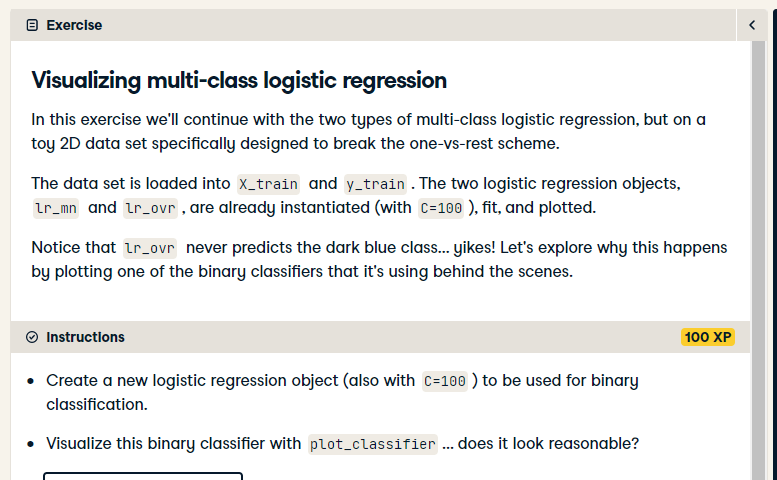

Softmax     training accuracy: 0.952
One-vs-rest training accuracy: 0.952


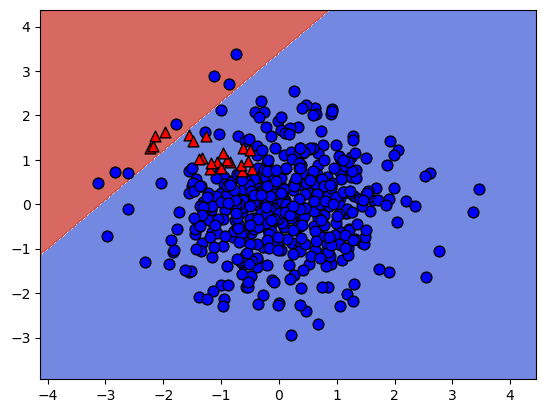

In [221]:
# Print training accuracies
print("Softmax     training accuracy:", lr_mn.score(X_train, y_train))
print("One-vs-rest training accuracy:", lr_ovr.score(X_train, y_train))

# Create the binary classifier (class 1 vs. rest)
lr_class_1 = LogisticRegression(C=100)
lr_class_1.fit(X_train, y_train==1)

# Plot the binary classifier (class 1 vs. rest)
plot_classifier(X_train, y_train==1, lr_class_1)

As you can see, the binary classifier incorrectly labels almost all points in class 1 (shown as red triangles in the final plot)! Thus, this classifier is not a very effective component of the one-vs-rest classifier. In general, though, one-vs-rest often works well.

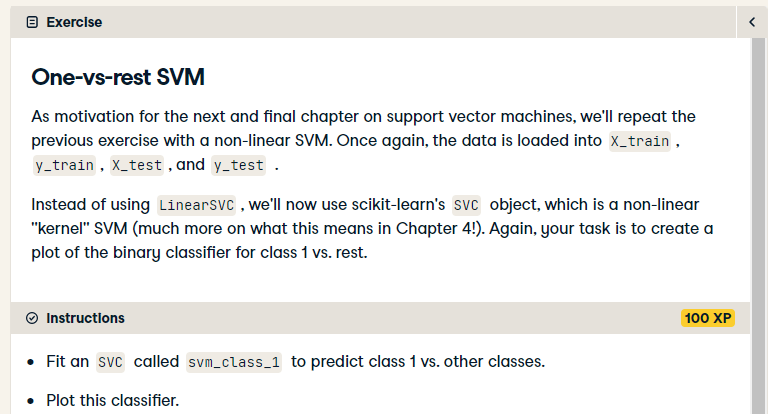

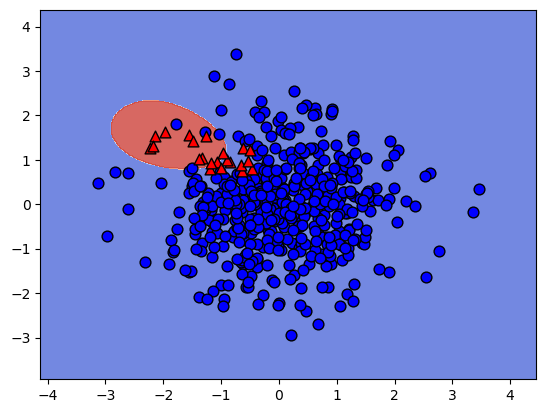

In [223]:
# We'll use SVC instead of LinearSVC from now on
from sklearn.svm import SVC

# Create/plot the binary classifier (class 1 vs. rest)
svm_class_1 = SVC()
svm_class_1.fit(X_train, y_train==1)
plot_classifier(X_train, y_train==1, svm_class_1)


What is an SVM?
* Linear classifiers (so far)
* Trained using the hinge loss and L2 regularization

What are support vectors?
* Support vector: a training example not in the flat part of the loss diagram
* Support vector: an example that is incorrectly classified or close to the boundary
* If an example is not a support vector, removing it has no effect on the model
* Having a small number of support vectors makes kernel SVMs really fast

# Max-margin viewpoint
* The SVM maximizes the "margin" for linearly separable datasets
* Margin: distance from the boundary to the closest points

* SVM = hinge loss with L2 regularization

In [224]:
X, y = (np.array([[14.23,  1.71],        [13.2 ,  1.78],        [13.16,  2.36],        [14.37,  1.95],        [13.24,  2.59],        [14.2 ,  1.76],        [14.39,  1.87],        [14.06,  2.15],        [14.83,  1.64],        [13.86,  1.35],        [14.1 ,  2.16],        [14.12,  1.48],        [13.75,  1.73],        [14.75,  1.73],        [14.38,  1.87],        [13.63,  1.81],        [14.3 ,  1.92],        [13.83,  1.57],        [14.19,  1.59],        [13.64,  3.1 ],        [14.06,  1.63],        [12.93,  3.8 ],        [13.71,  1.86],        [12.85,  1.6 ],        [13.5 ,  1.81],        [13.05,  2.05],        [13.39,  1.77],        [13.3 ,  1.72],        [13.87,  1.9 ],        [14.02,  1.68],        [13.73,  1.5 ],        [13.58,  1.66],        [13.68,  1.83],        [13.76,  1.53],        [13.51,  1.8 ],        [13.48,  1.81],        [13.28,  1.64],        [13.05,  1.65],        [13.07,  1.5 ],        [14.22,  3.99],        [13.56,  1.71],        [13.41,  3.84],        [13.88,  1.89],        [13.24,  3.98],        [13.05,  1.77],        [14.21,  4.04],        [14.38,  3.59],        [13.9 ,  1.68],        [14.1 ,  2.02],        [13.94,  1.73],        [13.05,  1.73],        [13.83,  1.65],        [13.82,  1.75],        [13.77,  1.9 ],        [13.74,  1.67],        [13.56,  1.73],        [14.22,  1.7 ],        [13.29,  1.97],        [13.72,  1.43],        [12.37,  0.94],        [12.33,  1.1 ],        [12.64,  1.36],        [13.67,  1.25],        [12.37,  1.13],        [12.17,  1.45],        [12.37,  1.21],        [13.11,  1.01],        [12.37,  1.17],        [13.34,  0.94],        [12.21,  1.19],        [12.29,  1.61],        [13.86,  1.51],        [13.49,  1.66],        [12.99,  1.67],        [11.96,  1.09],        [11.66,  1.88],        [13.03,  0.9 ],        [11.84,  2.89],        [12.33,  0.99],        [12.7 ,  3.87],        [12.  ,  0.92],        [12.72,  1.81],        [12.08,  1.13],        [13.05,  3.86],        [11.84,  0.89],        [12.67,  0.98],        [12.16,  1.61],        [11.65,  1.67],        [11.64,  2.06],        [12.08,  1.33],        [12.08,  1.83],        [12.  ,  1.51],        [12.69,  1.53],        [12.29,  2.83],        [11.62,  1.99],        [12.47,  1.52],        [11.81,  2.12],        [12.29,  1.41],        [12.37,  1.07],        [12.29,  3.17],        [12.08,  2.08],        [12.6 ,  1.34],        [12.34,  2.45],        [11.82,  1.72],        [12.51,  1.73],        [12.42,  2.55],        [12.25,  1.73],        [12.72,  1.75],        [12.22,  1.29],        [11.61,  1.35],        [11.46,  3.74],        [12.52,  2.43],        [11.76,  2.68],        [11.41,  0.74],        [12.08,  1.39],        [11.03,  1.51],        [11.82,  1.47],        [12.42,  1.61],        [12.77,  3.43],        [12.  ,  3.43],        [11.45,  2.4 ],        [11.56,  2.05],        [12.42,  4.43],        [13.05,  5.8 ],        [11.87,  4.31],        [12.07,  2.16],        [12.43,  1.53],        [11.79,  2.13],        [12.37,  1.63],        [12.04,  4.3 ],        [12.86,  1.35],        [12.88,  2.99],        [12.81,  2.31],        [12.7 ,  3.55],        [12.51,  1.24],        [12.6 ,  2.46],        [12.25,  4.72],        [12.53,  5.51],        [13.49,  3.59],        [12.84,  2.96],        [12.93,  2.81],        [13.36,  2.56],        [13.52,  3.17],        [13.62,  4.95],        [12.25,  3.88],        [13.16,  3.57],        [13.88,  5.04],        [12.87,  4.61],        [13.32,  3.24],        [13.08,  3.9 ],        [13.5 ,  3.12],        [12.79,  2.67],        [13.11,  1.9 ],        [13.23,  3.3 ],        [12.58,  1.29],        [13.17,  5.19],        [13.84,  4.12],        [12.45,  3.03],        [14.34,  1.68],        [13.48,  1.67],        [12.36,  3.83],        [13.69,  3.26],        [12.85,  3.27],        [12.96,  3.45],        [13.78,  2.76],        [13.73,  4.36],        [13.45,  3.7 ],        [12.82,  3.37],        [13.58,  2.58],        [13.4 ,  4.6 ],        [12.2 ,  3.03],        [12.77,  2.39],        [14.16,  2.51],        [13.71,  5.65],        [13.4 ,  3.91],        [13.27,  4.28],        [13.17,  2.59],        [14.13,  4.1 ]]), np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,        2, 2]))

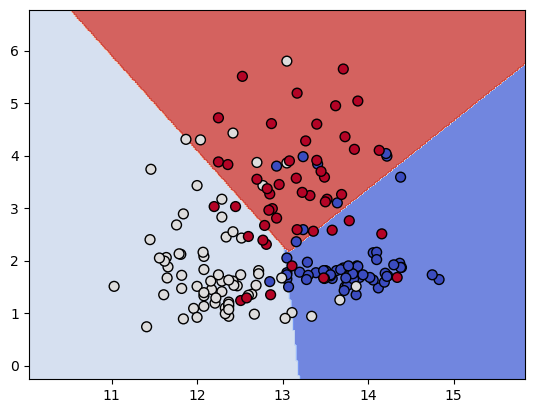

Number of original examples 178
Number of support vectors 81


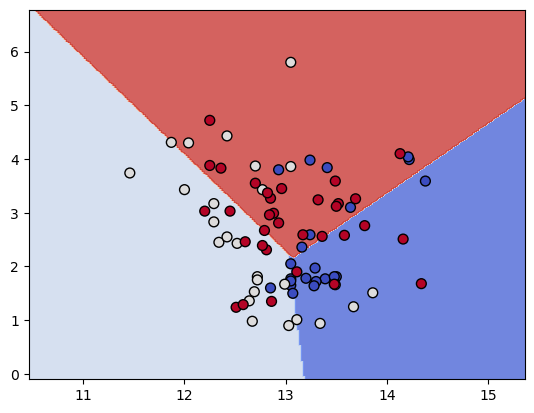

In [227]:
# Train a linear SVM
svm = SVC(kernel="linear")
svm.fit(X,y)
plot_classifier(X, y, svm)

# Make a new data set keeping only the support vectors
print("Number of original examples", len(X))
print("Number of support vectors", len(svm.support_))
X_small = X[svm.support_]
y_small = y[svm.support_]

# Train a new SVM using only the support vectors
svm_small = SVC(kernel="linear")
svm_small.fit(X_small, y_small)
plot_classifier(X_small, y_small, svm_small)

# Transforming features
* can transform features to make points linearly separeable
i.e. transformed feature=(original feature)^2

* **fitting a linear model in a transformed space corresponds to a non-linear model in the original space**

# kernals and SVM kernals implement feature transformations in a computationally efficiently way
* **default is radial basis func or "RBF"**
# Gamma (hyperparameter)
* gamma default = 1 
* gamma controls fitting
* too large = overfitting
* too small = underfitting

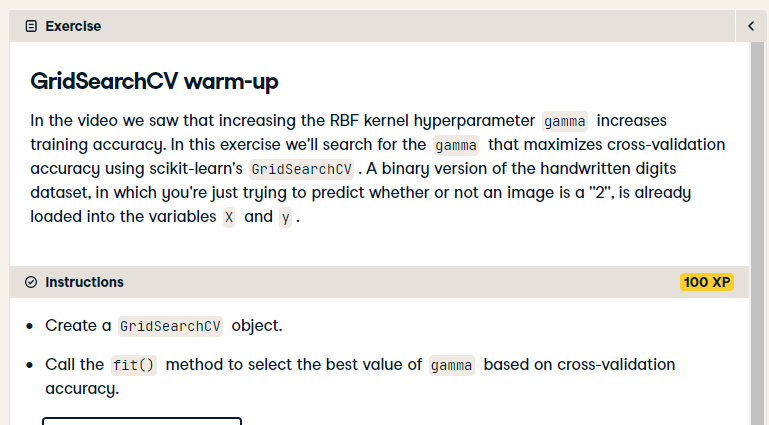

In [230]:
X_y = np.genfromtxt('X,y2.txt' , delimiter=',')
X = X_y[:,1:65]
y = X_y[:,[64]]

In [231]:
# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X,y)

# Report the best parameters
print("Best CV params", searcher.best_params_)

Best CV params {'gamma': 0.001}


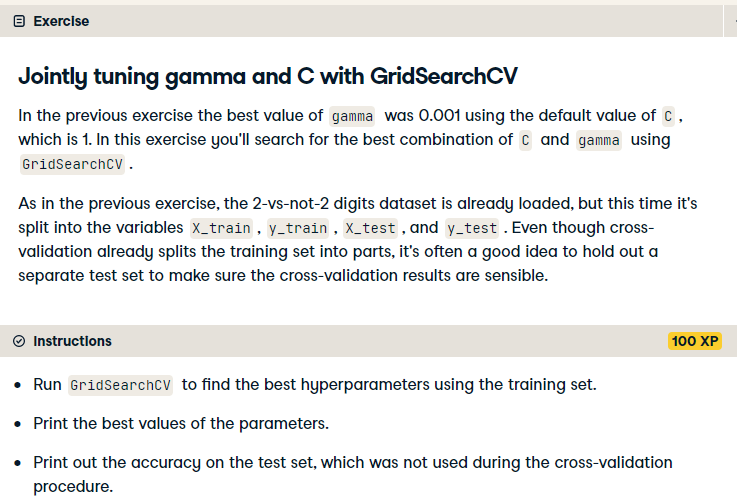

In [232]:
X_y = np.genfromtxt('X,y Train.txt' , delimiter=',')
X = X_y[:,1:65]
y = X_y[:,[64]]

In [233]:
# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Best CV params {'C': 10, 'gamma': 0.1}
Best CV accuracy 0.9639999999999999
Test accuracy of best grid search hypers: 0.97


## Pros and Cons (Logistic-Regression vs SVM)

### **Logistic regression:**

* Is a linear classifier
* Can use with kernels, but slow
* Outputs meaningful probabilities
* Can be extended to multi-class
* All data points affect fit
* L2 or L1 regularization

### **Support vector machine (SVM):**

* Is a linear classifier
* Can use with kernels, and fast
* Does not naturally output probabilities
* Can be extended to multi-class
* Only "support vectors" affect fit
* Conventionally just L2 regularization

<br>

## Logistic regression in sklearn:

* linear_model.LogisticRegression

### Key hyperparameters in sklearn:

* C (inverse regularization strength)
* penalty (type of regularization)
* multi_class (type of multi-class)
<br>

## SVM in sklearn:

* svm.LinearSVC and svm.SVC

### Key hyperparameters in sklearn:

* C (inverse regularization strength)
* kernel (type of kernel)
* gamma (inverse RBF smoothness)

# SGDClassifier
### SGDClassifier: scales well to large datasets
In [1]: from sklearn.linear_model import SGDClassifier <br>
In [2]: logreg = SGDClassifier(loss='log') <br>
In [3]: linsvm = SGDClassifier(loss='hinge') <br>
* SGDClassifier hyperparameter alpha is like 1/C

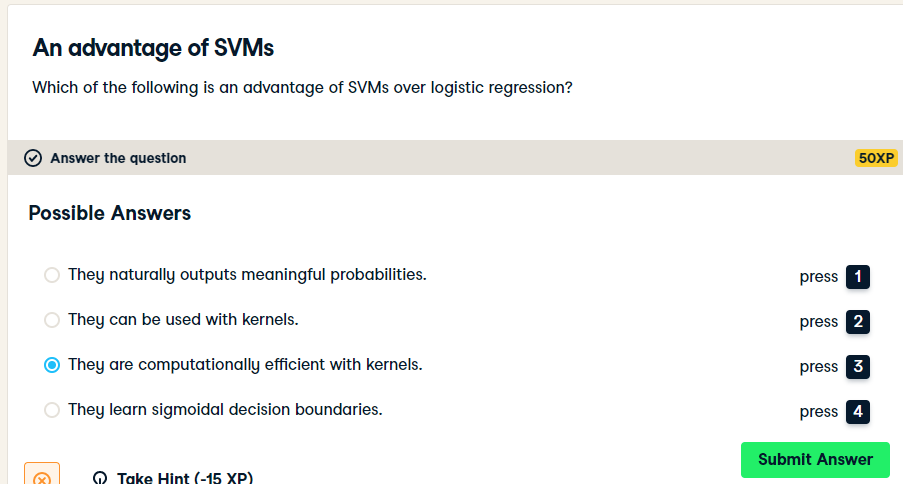
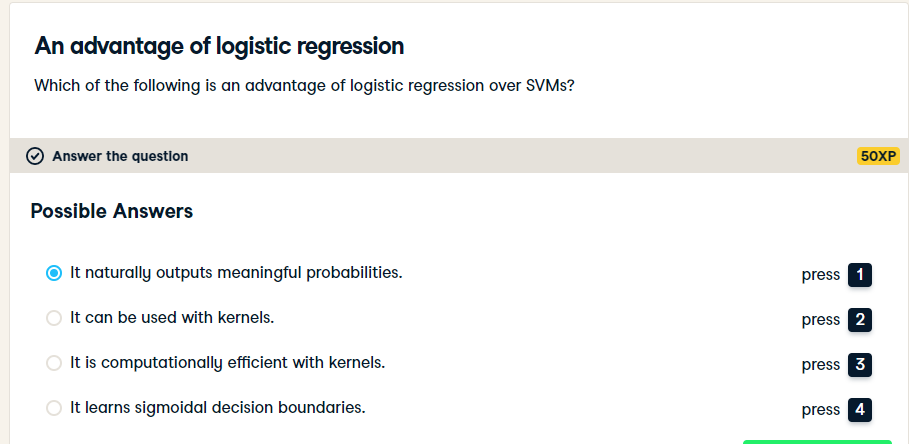

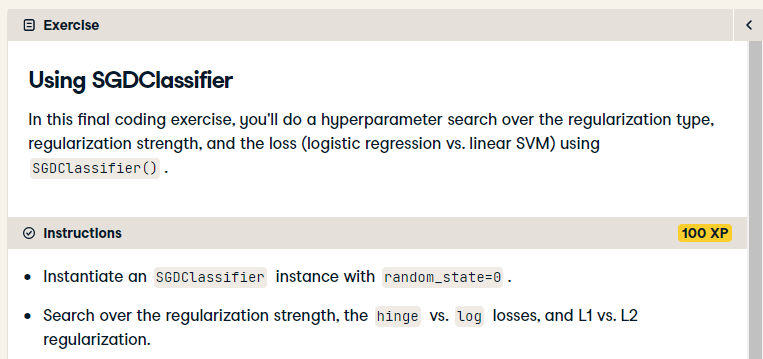

In [235]:
X_y = np.genfromtxt('XYtest.txt' , delimiter=',')
X = X_y[:,1:65]
y = X_y[:,[64]]

In [237]:
from sklearn.linear_model import SGDClassifier
# We set random_state=0 for reproducibility 
linear_classifier = SGDClassifier(random_state=0)

# Instantiate the GridSearchCV object and run the search
parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
             'loss':['hinge','log'], 'penalty':['l1','l2']}
searcher = GridSearchCV(linear_classifier, parameters, cv=10)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Best CV params {'alpha': 0.01, 'loss': 'hinge', 'penalty': 'l1'}
Best CV accuracy 0.9039999999999999
Test accuracy of best grid search hypers: 0.932
